### Сборный проект №1
[ссылка на практикум](https://practicum.yandex.ru/learn/data-scientist/courses/05fc6f4e-775b-43b8-b9d3-6eb470e1a00a/sprints/176021/topics/2bb8744d-a0e9-4da9-9cfc-8a23a90a39b1/lessons/48a04d31-755b-4ca1-a953-1a9bd1b3169e/)

#### Описание проекта


Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.

В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

##### Описание данных

    Name — название игры
    Platform — платформа
    Year_of_Release — год выпуска
    Genre — жанр игры
    NA_sales — продажи в Северной Америке (миллионы проданных копий)
    EU_sales — продажи в Европе (миллионы проданных копий)
    JP_sales — продажи в Японии (миллионы проданных копий)
    Other_sales — продажи в других странах (миллионы проданных копий)
    Critic_Score — оценка критиков (максимум 100)
    User_Score — оценка пользователей (максимум 10)
    Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

#### Шаг 1. Открыть данные, изучить информацию

In [2]:
import pandas as pd

In [3]:
# раскомментировать строку с путем до файла для ревьюера

dataset_link = '/datasets/games.csv'



"\ndataset_link = '/datasets/games.csv'\n\n"

In [4]:
# закомментировать строку с путем до файла( на моем диске)
"""
dataset_link = '/Users/tony_builder/Documents/GitHub/studying/yandex_practicum/data/games.csv'
"""

In [5]:
data = pd.read_csv(dataset_link)
data.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [6]:
data.shape

(16715, 11)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


<font color='red'>**Вывод по шагу 1:**</font>

- 16715 строк, 11 столбцов
- есть пустые значения 
- названия столбцов нужно привести в соответствие

<font color='green'>**Итог:**</font> данные требуют предобработки

#### Шаг 2. Подготовка данных для анализа

##### 2.1. Сначала приведем все имена столбцов к нижнему регистру

In [8]:
for col in data.columns:
    data = data.rename(columns={col: col.lower()})

In [9]:
data.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

Выше видим, что все сработало. Но тут мало столбцов, а так можно проверить, что все столбцы теперь в нижнем регистре: 

- возьмем итератор, в котором заменим все названия столбца на булево значение (проверка на то, что название столбца в нижнем регистре)
- посчитаем сумму итератора (должны быть все единички)
- вычтем число столбцов = 11

Должно получиться 0

In [10]:
sum((col.islower() for col in data.columns)) - 11

0

##### 2.2. Теперь поработаем с пропусками

###### 2.2.1 в столбце name 

In [11]:
data[data.name.isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


всего два значения, причем второе не вызывает никаких сомнений - удалить без жалости.

а что со вторым? по нему могут быть интересны только продажи по году (1993) и по платформе (GEN) - именно на эти параметры могут повлиять суммы продаж при построении сводных. Посмотрим на них внимательно


In [12]:
data.groupby('year_of_release').\
    agg({'na_sales': 'sum', 'eu_sales': 'sum', 'other_sales': 'sum'}).\
    query('year_of_release == 1993.0')

,na_sales,eu_sales,other_sales
year_of_release,,,
1993.0,16.9,5.18,0.97


ну вообще-то продажи безымянной игры по регионам составляют аж 10% от общих продаж по году.

пренебрегать такими данными нельзя.

In [13]:
# убираем только вторую строку
data.drop(index=14244, inplace=True)

Заменим значение nan на unknown 

In [14]:
data.name.fillna('unknown', inplace=True)

In [15]:
data[data.name.isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating


Неплохо бы поменять тип столбца год выпуска на целочисленное значение, но там 269 пустых значений с типом float.

посмотрим что это за значения

###### 2.2.2. пропуски в столбце год выпуска

In [16]:
data[data.year_of_release.isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16373,PDC World Championship Darts 2008,PSP,NaN,Sports,0.01,0.00,0.00,0.00,43.0,tbd,E10+
16405,Freaky Flyers,GC,NaN,Racing,0.01,0.00,0.00,0.00,69.0,6.5,T
16448,Inversion,PC,NaN,Shooter,0.01,0.00,0.00,0.00,59.0,6.7,M
16458,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN


Интересно: в названии игр встречается упоминание о годе. Может отсюда можно почерпнуть информацию для пустых значений по году?

Проверим это:
- сделаем срез по всем играм, у которых указан год в имени
- оставим только те, у которых значение в столбце год выпуска не пустое
- если они совпадают  - можно сделать вывод, что это применимо и к остальным играм

In [17]:
import re
import numpy as np

Используем регулярные выражения для поиска четырехзначного числа в составе текстовой строки

In [18]:
regex = r"[0-9]{4}"

print(re.search(regex, 'FIFA Soccer 2004').group())

2004


Создадим вспомогательную функцию поиска и вытягивания найденного четырехзначного числа из текстовой строки

In [19]:
def find_year_in_name(string):
    regex = r"[0-9]{4}"
    match = re.search(regex, str(string))
    return match.group() if match else None

Создадим столбец "Год в названии", применив созданную функцию

In [20]:
data['year_in_name'] = data.name.apply(find_year_in_name)

посмотрим на данные, в которых оставим только те строки, где последний столбец - не пустой

In [21]:
data[~data.year_in_name.isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,year_in_name
87,Star Wars Battlefront (2015),PS4,2015.0,Shooter,2.99,3.49,0.22,1.28,NaN,NaN,NaN,2015
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E,2004
206,Warzone 2100,PS,1999.0,Strategy,2.79,1.89,0.00,0.33,NaN,NaN,NaN,2100
238,Madden NFL 2005,PS2,2004.0,Sports,4.18,0.26,0.01,0.08,91.0,7.9,E,2005
250,Winning Eleven: Pro Evolution Soccer 2007,PS2,2006.0,Sports,0.10,2.39,1.05,0.86,86.0,8.9,E,2007
...,...,...,...,...,...,...,...,...,...,...,...,...
16676,G1 Jockey 4 2008,PS3,2008.0,Sports,0.00,0.00,0.00,0.00,NaN,NaN,NaN,2008
16697,Bust-A-Move 3000,GC,2003.0,Puzzle,0.01,0.00,0.00,0.00,53.0,tbd,E,3000
16709,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,0.00,0.00,0.00,0.00,NaN,NaN,NaN,1000
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN,2007


Бегло пройдясь сходу видны и явные ошибки такого метода - например, в названии игры "SCORE International Baja 1000: The Official Game" есть цифра 1000, но разумеется это не может быть годом.

вывод - нужно немного доработать функцию find_year_in_name

In [22]:
# посмотрим весь дипазон годов выпуска игр
sorted(data.year_of_release.unique())

[1980.0,
 1981.0,
 1982.0,
 1983.0,
 1984.0,
 1985.0,
 1986.0,
 1987.0,
 1988.0,
 1989.0,
 1990.0,
 1991.0,
 1992.0,
 1993.0,
 1994.0,
 1995.0,
 1996.0,
 1997.0,
 1998.0,
 1999.0,
 2000.0,
 2001.0,
 2002.0,
 2003.0,
 2004.0,
 2005.0,
 2006.0,
 2007.0,
 2008.0,
 2009.0,
 2010.0,
 2011.0,
 2012.0,
 2013.0,
 2014.0,
 2015.0,
 2016.0,
 nan]

Будем вытягивать только те годы, которые ложатся в диапазон от 1980 до 2016 - как во всем наборе данных

In [23]:
def find_year_in_name_2(string):
    regex = r"[0-9]{4}"
    match = re.search(regex, str(string))
    if match:
        res = int(match.group())
        if 1980<=res <= 2016  : return res

    else: return None

In [24]:
data.drop(columns= 'year_in_name', inplace=True)

Снова создаем столбец Год в названии, используя уточненную функцию

In [25]:
data['year_in_name'] = data.name.apply(find_year_in_name_2)

In [26]:
data[~data.year_in_name.isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,year_in_name
87,Star Wars Battlefront (2015),PS4,2015.0,Shooter,2.99,3.49,0.22,1.28,NaN,NaN,NaN,2015.0
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E,2004.0
238,Madden NFL 2005,PS2,2004.0,Sports,4.18,0.26,0.01,0.08,91.0,7.9,E,2005.0
250,Winning Eleven: Pro Evolution Soccer 2007,PS2,2006.0,Sports,0.10,2.39,1.05,0.86,86.0,8.9,E,2007.0
283,Madden NFL 2003,PS2,2002.0,Sports,3.36,0.21,0.01,0.56,95.0,7.7,E,2003.0
...,...,...,...,...,...,...,...,...,...,...,...,...
16638,Tour de France 2014,PS3,2014.0,Sports,0.00,0.01,0.00,0.00,NaN,tbd,E,2014.0
16658,Driving Simulator 2011,PC,2011.0,Racing,0.00,0.01,0.00,0.00,NaN,NaN,NaN,2011.0
16676,G1 Jockey 4 2008,PS3,2008.0,Sports,0.00,0.00,0.00,0.00,NaN,NaN,NaN,2008.0
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN,2007.0


Выберем только те строки, у которых в обоих столбца по годам нет пустых значений

In [27]:
data[(~data.year_of_release.isna()) & (~data.year_in_name.isna())]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,year_in_name
87,Star Wars Battlefront (2015),PS4,2015.0,Shooter,2.99,3.49,0.22,1.28,NaN,NaN,NaN,2015.0
238,Madden NFL 2005,PS2,2004.0,Sports,4.18,0.26,0.01,0.08,91.0,7.9,E,2005.0
250,Winning Eleven: Pro Evolution Soccer 2007,PS2,2006.0,Sports,0.10,2.39,1.05,0.86,86.0,8.9,E,2007.0
283,Madden NFL 2003,PS2,2002.0,Sports,3.36,0.21,0.01,0.56,95.0,7.7,E,2003.0
333,Mario & Sonic at the London 2012 Olympic Games,Wii,2011.0,Sports,1.12,1.87,0.27,0.45,NaN,NaN,NaN,2012.0
...,...,...,...,...,...,...,...,...,...,...,...,...
16638,Tour de France 2014,PS3,2014.0,Sports,0.00,0.01,0.00,0.00,NaN,tbd,E,2014.0
16658,Driving Simulator 2011,PC,2011.0,Racing,0.00,0.01,0.00,0.00,NaN,NaN,NaN,2011.0
16676,G1 Jockey 4 2008,PS3,2008.0,Sports,0.00,0.00,0.00,0.00,NaN,NaN,NaN,2008.0
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN,2007.0


Очень похоже на то, что игра выпущена либо в тот же год, что упоминается в названии, либо на следующий

Чтобы проверить эту теорию, создадим вспомогательный датафрейм и столбец "Проверить год", который будет отображать равен ли год, указанный в названии, фактическому году выпуска, либо он меньше на единицу

In [28]:
temp_df =  data[(~data.year_of_release.isna()) & (~data.year_in_name.isna())]\
            [['name', 'year_of_release', 'year_in_name']]

temp_df['check_year'] = abs(temp_df.year_of_release - temp_df.year_in_name) <=1
temp_df.head()

,name,year_of_release,year_in_name,check_year
87,Star Wars Battlefront (2015),2015.0,2015.0,True
238,Madden NFL 2005,2004.0,2005.0,True
250,Winning Eleven: Pro Evolution Soccer 2007,2006.0,2007.0,True
283,Madden NFL 2003,2002.0,2003.0,True
333,Mario & Sonic at the London 2012 Olympic Games,2011.0,2012.0,True


In [29]:
temp_df.shape

(815, 4)

In [30]:
temp_df.check_year.sum()

784

Так, получается, что 31 строка не следует логике, что игра выпускается либо в этот же год, что указан в названии, либо на следующий.

Посмотрим что это за значения

In [31]:
temp_df[~temp_df.check_year]

,name,year_of_release,year_in_name,check_year
769,SimCity 2000,1992.0,2000.0,False
926,FIFA 2000,1998.0,2000.0,False
1004,Madden NFL 2000,1998.0,2000.0,False
1237,NBA Live 2000,1998.0,2000.0,False
1646,SimCity 2000,1996.0,2000.0,False
1891,NFL Blitz 2000,1998.0,2000.0,False
2076,NFL Fever 2002,2000.0,2002.0,False
2395,NHL 2000,1998.0,2000.0,False
3042,Tiger Woods PGA Tour 2000,1998.0,2000.0,False
4066,SimCity 2000,1995.0,2000.0,False


Разброс может быть разным. 
посчитаем разницу в годах и построим распределение

In [32]:
temp_df['year_diff'] = abs(temp_df.year_of_release - temp_df.year_in_name)

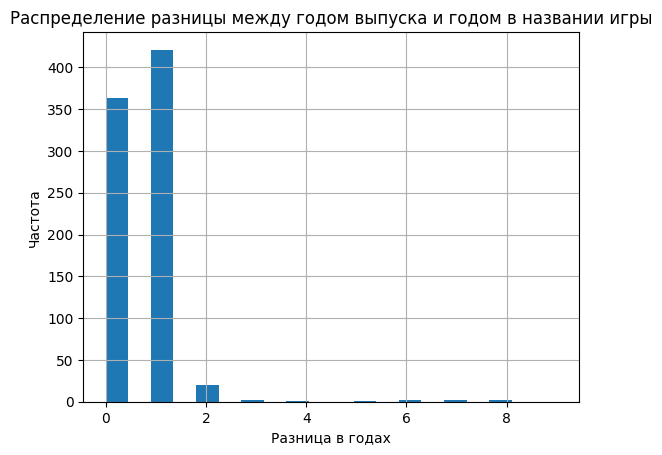

In [33]:
import matplotlib.pyplot as plt

plt.title('Распределение разницы между годом выпуска и годом в названии игры')
plt.ylabel('Частота')
plt.xlabel('Разница в годах')
temp_df.year_diff.hist(range=(0,9), bins=20)
plt.show()




Вывод: чаще всего игра выпускается на следующий год от указанного в названии игры. 

Заполним пустые значения годов выпуска информацией из названия игры + 1

In [34]:
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,year_in_name
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E,NaN
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,NaN
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E,NaN
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,NaN


In [35]:
data.year_of_release.isna().sum()

269

In [36]:
data.year_in_name.unique()

array([  nan, 2015., 2004., 2005., 2007., 2003., 2012., 2008., 2014.,
       2002., 2006., 2009., 2013., 2011., 2010., 2000., 2001., 2016.,
       1999., 1996.])

In [37]:
data.year_of_release= data.year_of_release.fillna(data.year_in_name +1)

In [38]:
data.year_of_release.isna().sum()

252

Получается, заполнили 17 пустых значений. Осталось еще 252 пустых значения.

Вот все эти игры:

In [39]:
data[data.year_of_release.isna()].name.unique()

array(['LEGO Batman: The Videogame', 'Space Invaders', 'Rock Band',
       "Frogger's Adventures: Temple of the Frog",
       'LEGO Indiana Jones: The Original Adventures', 'Call of Duty 3',
       'Call of Duty: Black Ops', 'Triple Play 99', 'Adventure', 'Combat',
       'LEGO Harry Potter: Years 5-7', 'Hitman 2: Silent Assassin',
       'Legacy of Kain: Soul Reaver', 'Donkey Kong Land III',
       'Air-Sea Battle', 'Suikoden III', 'Wheel of Fortune', 'Yakuza 4',
       'Namco Museum', 'Rhythm Heaven',
       'The Lord of the Rings: War in the North', 'Madden NFL 07',
       'MLB SlugFest 20-03', 'Shaun White Snowboarding',
       'WarioWare: Twisted!', 'Madden NFL 11', 'Test Drive Unlimited 2',
       'The Chronicles of Narnia: The Lion, The Witch and The Wardrobe',
       'Monster Hunter 2', 'Metal Gear Solid 2: Substance',
       'Advance Wars: Days of Ruin', 'The Golden Compass',
       'Madden NFL 06', 'NASCAR: Dirt to Daytona',
       'Def Jam: Fight for NY', 'NBA Street Vol. 2'

Тут два варианта:

1) запросить годы выпуска каждой игры (либо нагуглить самостоятельно)
2) либо заменить все пустые значения по году на условное значение, по которому будет удобно группировать при необходимости. 0 вполне подойдет - это позволит заодно привести значения в столбце к целочисленному значению. 

Но для себя помним, что ноль означает "Отсутствие информации о годе выпуска"

In [40]:
data.year_of_release= data.year_of_release.fillna(0).astype('int')

In [41]:
data.year_of_release.isna().sum()

0

избавимся от вспомогательного столбца year_in_name

In [42]:
data.drop(columns= 'year_in_name', inplace=True)

In [43]:
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [44]:
data.year_of_release.value_counts()

2008    1428
2009    1428
2010    1256
2007    1199
2011    1136
2006    1008
2005     941
2002     829
2003     776
2004     766
2012     654
2015     606
2014     582
2013     544
2016     502
2001     482
1998     379
2000     350
1999     338
1997     289
1996     263
0        252
1995     219
1994     121
1993      61
1981      46
1992      43
1991      41
1982      36
1986      21
1989      17
1983      17
1990      16
1987      16
1988      15
1985      14
1984      14
1980       9
Name: year_of_release, dtype: int64

###### 2.2.3 Пропуски в столбце Жанр

In [45]:
data[data.genre.isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,unknown,GEN,1993,NaN,1.78,0.53,0.0,0.08,NaN,NaN,NaN


Это уже знакомая нам строка с неизвестным названием игры. Заменим на unknown 

In [46]:
data.genre.fillna('unknown', inplace=True)

###### 2.2.4. Пропуски в столбце Оценка критиков

Посмотрим на гистограмму

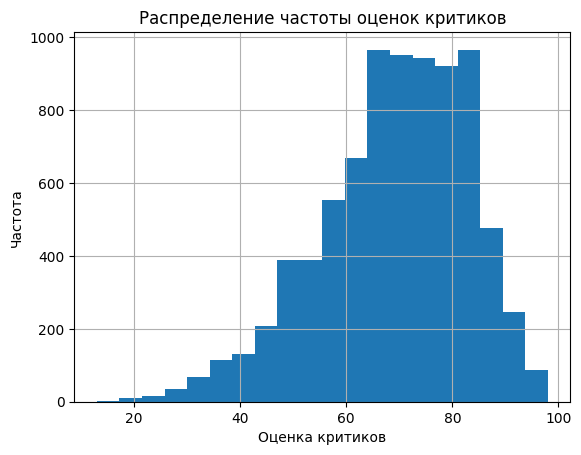

In [47]:

plt.title('Распределение частоты оценок критиков')
plt.ylabel('Частота')
plt.xlabel('Оценка критиков')
data.critic_score.hist(bins=20)

plt.show()

На гистограмме оценок критиков ничего необычного нет. Распределение похоже на нормальное со смещением. Среднее лежит где-то в диапазоне от 60 до 80

In [48]:
data.critic_score.describe()

count    8137.000000
mean       68.967679
std        13.938165
min        13.000000
25%        60.000000
50%        71.000000
75%        79.000000
max        98.000000
Name: critic_score, dtype: float64

In [49]:
data.critic_score.median()

71.0

Медиана и среднее практически одинаковы. 

Теоретически, можно бы уже заполнить пустые значения - медианным. 



Но все же возможно есть зависимость между оценкой критиков и годом выпуска,  или жанром игры,  или суммарными продажами, или платформой, на которой выпускается игра

Добавим столбец суммарных продаж

In [50]:
data['total_sales'] = data.na_sales+ data.eu_sales + data.jp_sales + data.other_sales

Добавим столбец жанров, переведенных в числовые значения (для поиска корреляции)

In [51]:
data.genre.unique()

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy', 'unknown'], dtype=object)

In [52]:
# создадим промежуточный словарь
genre_dict = {x:y for x,y in zip(data.genre.unique(), range(0,13))}

In [53]:
genre_dict

{'Sports': 0,
 'Platform': 1,
 'Racing': 2,
 'Role-Playing': 3,
 'Puzzle': 4,
 'Misc': 5,
 'Shooter': 6,
 'Simulation': 7,
 'Action': 8,
 'Fighting': 9,
 'Adventure': 10,
 'Strategy': 11,
 'unknown': 12}

In [54]:
data['genre_id'] = data.genre.apply(lambda x: genre_dict[x])

In [55]:
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales,genre_id
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8,E,82.54,0
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24,1
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52,2
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8,E,32.77,0
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38,3


проделаем то же самое для столбцов в названии платформы

In [56]:
data.platform.unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       'PS4', '3DS', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne',
       'WiiU', 'GC', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

In [57]:
# создадим вспомогательный словарь
platform_dict = {x:y for x,y in zip(data.platform.unique(), range(0,31))}

In [58]:
data['platform_id'] = data.platform.apply(lambda x: platform_dict[x])

In [59]:
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales,genre_id,platform_id
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8,E,82.54,0,0
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24,1,1
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52,2,0
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8,E,32.77,0,0
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38,3,2


Строим матрицу корреляции

In [60]:
data[['critic_score', 'platform_id', 'year_of_release', 'genre_id', 'total_sales']].corr()

,critic_score,platform_id,year_of_release,genre_id,total_sales
critic_score,1.000000,0.144613,0.019249,-0.081422,0.245507
platform_id,0.144613,1.000000,0.014709,0.059467,-0.087669
year_of_release,0.019249,0.014709,1.000000,-0.001563,0.014615
genre_id,-0.081422,0.059467,-0.001563,1.000000,-0.063309
total_sales,0.245507,-0.087669,0.014615,-0.063309,1.000000


Вывод - оценка критиков немного коррелирует с платформой и суммарными продажами и не зависит от года выпуска и жанра.

Тогда план такой:

- сгруппировать игры по суммарным продажам и платформе
- посчитать медианное значение оценки критиков
- заменить пустые значения оценок критиков точечно - с учетом платформы и суммарных продаж

In [61]:
data.groupby(['total_sales', 'platform']).agg({'critic_score':'median'}).\
    reset_index().rename(columns={'critic_score': 'med_cr_score'})

,total_sales,platform,med_cr_score
0,0.00,PS2,NaN
1,0.00,PS3,NaN
2,0.01,3DS,77.0
3,0.01,DS,55.0
4,0.01,GBA,67.0
...,...,...,...
3967,31.38,GB,NaN
3968,32.77,Wii,80.0
3969,35.52,Wii,82.0
3970,40.24,NES,NaN


добавим столбец полученных медианных значений в основную таблицу данных

In [62]:
data =  data.merge(data.groupby(['total_sales', 'platform']).agg({'critic_score':'median'}).\
                reset_index().rename(columns={'critic_score': 'med_cr_score'}),
                on=['total_sales', 'platform'],
                how='left')

заполним пропуски в столбце оценка критиков

In [63]:
data.critic_score.fillna(data.med_cr_score, inplace=True)

In [64]:
data.critic_score.isna().sum()

2014

получается, заполнили около 6000 пустых значений , но все равно осталось около 2000.

Очевидно, что оставшиеся пустые значения даже при группировке по конкретному жанру и конкретной суммарной выручке не имели вообще никаких значений оценок критиков

Посмотрим еще раз на рапределение, среднее и медиану

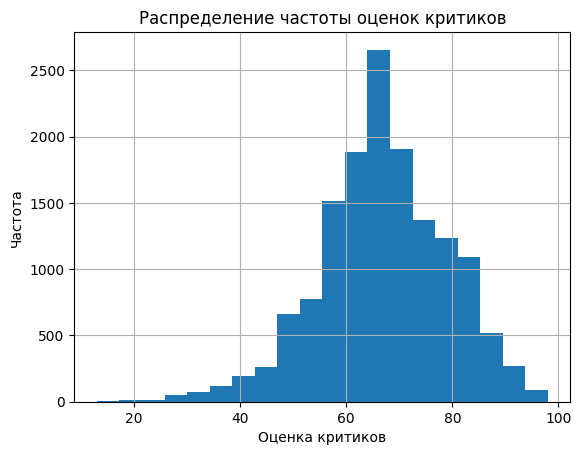

In [65]:
plt.title('Распределение частоты оценок критиков')
plt.ylabel('Частота')
plt.xlabel('Оценка критиков')
data.critic_score.hist(bins=20)

plt.show()

In [66]:
data.critic_score.describe()

count    14700.000000
mean        66.879252
std         12.037493
min         13.000000
25%         60.000000
50%         67.000000
75%         75.000000
max         98.000000
Name: critic_score, dtype: float64

In [67]:
data.critic_score.median()

67.0

значения среднего и медианы стали еще ближе. заполним оставшиеся пустые значения медианой

In [68]:
data.critic_score.fillna(67, inplace=True)

In [69]:
data.critic_score.isna().sum()

0

###### 2.2.5. Пропуски в столбце оценка пользователей

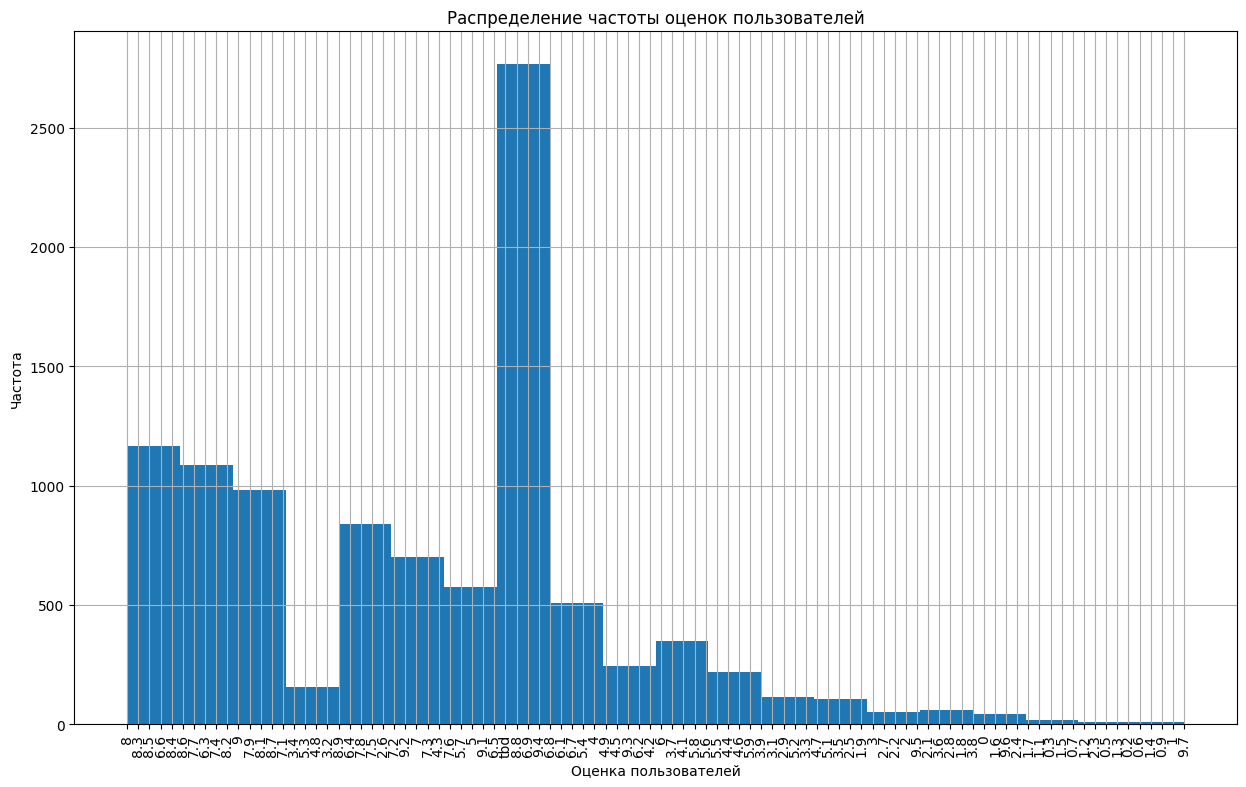

In [70]:
plt.title('Распределение частоты оценок пользователей')
plt.ylabel('Частота')
plt.xlabel('Оценка пользователей')
data.user_score.hist(bins=20, xrot=90, figsize=(15,9))

plt.show()

распределение совсем непохоже на нормальное, более того - является дискретным.


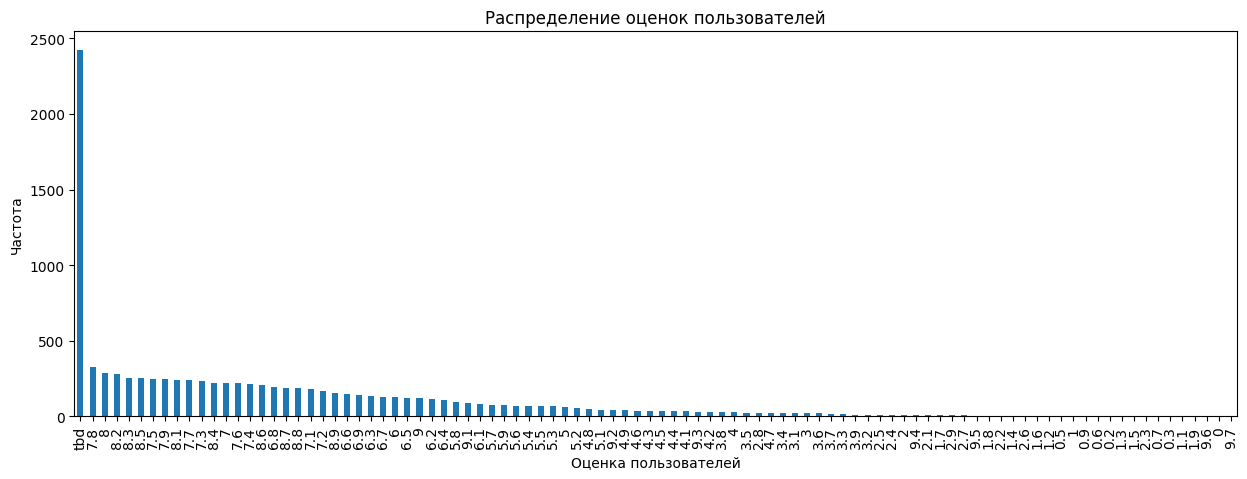

In [77]:
data.user_score.value_counts()\
    .plot(kind='bar', figsize=(15,5), title = 'Распределение оценок пользователей')

plt.ylabel('Частота')
plt.xlabel('Оценка пользователей')

plt.show()

Так, на графике видим:
1)  присутствует непонятная оценка "tbd" - самое популярное значение
2) далее самая популярная оценка в районе 7.5 - 8.5 (точнее 7.8)


        Tbd – это аббревиатура от английской фразы «To be determined», что в переводе означает «будет определено». То есть, когда игра имеет рейтинг Tbd, это означает, что ее рейтинг еще не был определен официальными ресурсами или критиками. Этот рейтинг указывает на то, что игра новая или еще не получила достаточное количество оценок, чтобы определить ее качество и уровень интересности.

In [78]:
data[data.user_score == 'tbd'].shape[0]

2424

In [79]:
data.user_score.isna().sum()

6700

Это значит, что помимо 6700 игр с  пустыми значениями в оценках пользователей присутствуют еще и 2424 игры, которым невозможно присвоить оценку, т.к игра новая или критической массы оценок пока недостаточно.

In [81]:
data[data.user_score == 'tbd'].year_of_release.unique()


array([2010, 2005, 2011,    0, 2009, 2004, 1999, 2001, 2008, 2007, 2003,
       2000, 2006, 2002, 2015, 2014, 2012, 2013, 2016, 1997])

Годы выпуска у этих игр самые разные. Многие игры новыми точно не назовешь. 

Посмотрим, какие игры считать новыми - выведем максимальный год, имеющийся в наличии в данных

In [82]:
data.year_of_release.max()

2016

Что ж, будем считать, что у игр 2016 года оценка вполне могла не сформироваться - заполним пустые значения столбца Оценка пользователя для 2016 года - значением 'tbd'

In [86]:
data.loc[(data.year_of_release==2016) & (data.user_score.isna()), 
         'user_score'] = 'tbd'

In [87]:
data.user_score.isna().sum()

6494

206 пустых значений заполнили.

остальные пустые значения могут быть в равной степени:

- пропущенными случайно при заполнении
- не иметь оценки в принципе (tbd)

Посмотрим как коррелирует оценка пользователей с годом выпуска, суммарными продажами, жанром, платформой и конечно оценкой критиков.

Причем сразу исключим из корреляции tbd значения 

In [93]:
data.query('user_score !="tbd"').user_score.unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', '8.8', '6.9', '9.4', '6.8', '6.1',
       '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6', '3.7',
       '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9', '3.1',
       '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3', '2.7',
       '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0', '1.6',
       '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2', '2.3',
       '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'], dtype=object)

In [95]:
temp_df_user_score = data.query('user_score !="tbd"')

In [100]:
temp_df_user_score.user_score.astype('float')

0        8.0
1        NaN
2        8.3
3        8.0
4        NaN
        ... 
16706    NaN
16707    NaN
16708    NaN
16710    NaN
16712    NaN
Name: user_score, Length: 14084, dtype: float64

In [102]:
temp_df_user_score[['user_score','critic_score', 'platform_id', 'year_of_release', 'genre_id', 'total_sales']].corr()

,user_score,critic_score,platform_id,year_of_release,genre_id,total_sales
user_score,1.000000,0.544623,0.097038,0.010058,0.004775,0.088179
critic_score,0.544623,1.000000,0.141207,0.016711,-0.083950,0.214826
platform_id,0.097038,0.141207,1.000000,0.015853,0.063229,-0.108866
year_of_release,0.010058,0.016711,0.015853,1.000000,-0.001399,0.015951
genre_id,0.004775,-0.083950,0.063229,-0.001399,1.000000,-0.073525
total_sales,0.088179,0.214826,-0.108866,0.015951,-0.073525,1.000000


Вполне ожидаемый результат - оценка пользователей неплохо коррелирует с оценкой критиков


Так, можно предполагать, что непустые оценки пользователей, связанные с оценкой критиков можно применить для заполнения пустых оценок пользователей при соответствующих значениях оценки критиков.

Однако, оценка пользователей является дискретной величиной, поэтому риск промахнуться с заполнением оценки может быть слишком высоким.

In [105]:
data.user_score.isna().sum()

6494

Выводы:
1) заменять пропуски в оценках пользователей не будем, потому что:
- величина дискретная
- имеет подавляющее число оценок =  'tbd', что буквально означает "нет оценки"
- сликшом высок риск ошибиться при заполнении оценки через корреляцию

2) 206 пустых значений **новых** игр заменили на значение tbd (нет оценки)

###### 2.2.6. Пропуски в столбце рейтинг

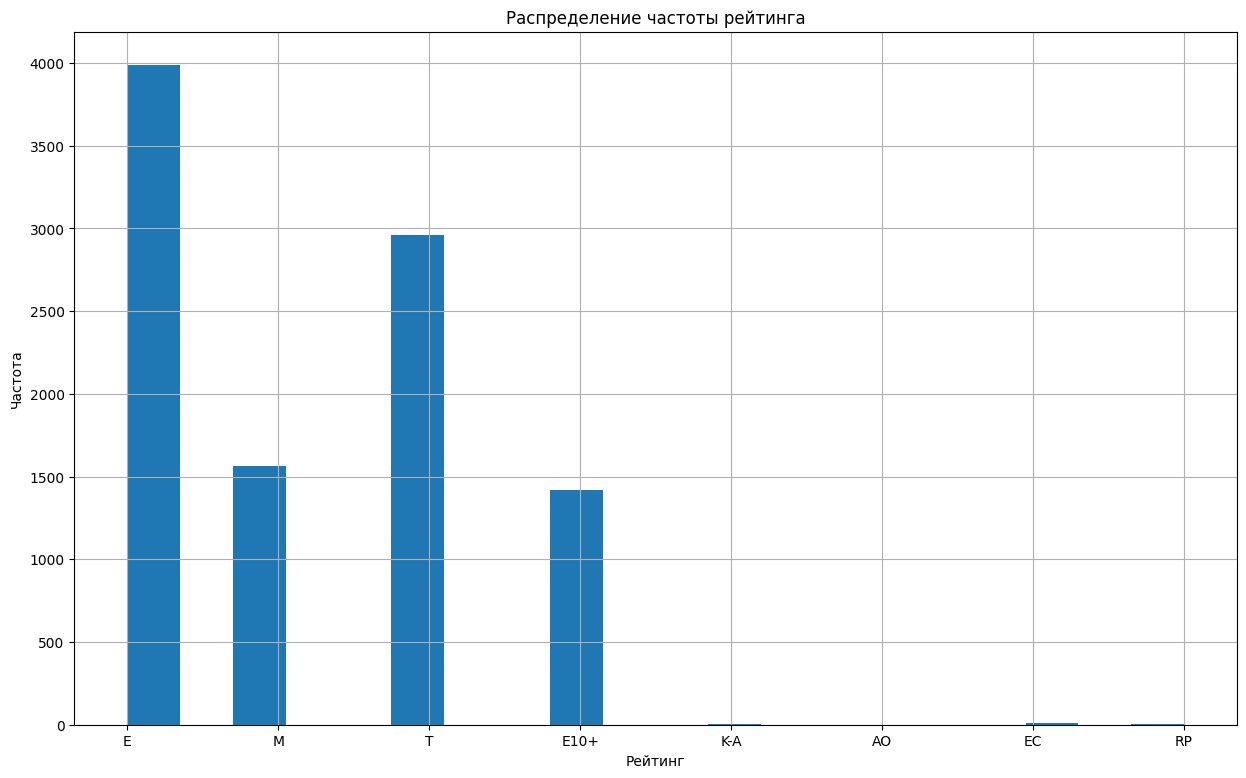

In [107]:
plt.title('Распределение частоты рейтинга')
plt.ylabel('Частота')
plt.xlabel('Рейтинг')
data.rating.hist(bins=20, figsize=(15,9))

plt.show()

Что ж, очевидно, что значимой частотой обладают четыре типа рейтинга: Е, М, Т, Е10+

Посмотрим на числовые значения частот рейтингов:

In [115]:
data.rating.value_counts(dropna=False)

NaN     6765
E       3990
T       2961
M       1563
E10+    1420
EC         8
K-A        3
RP         3
AO         1
Name: rating, dtype: int64

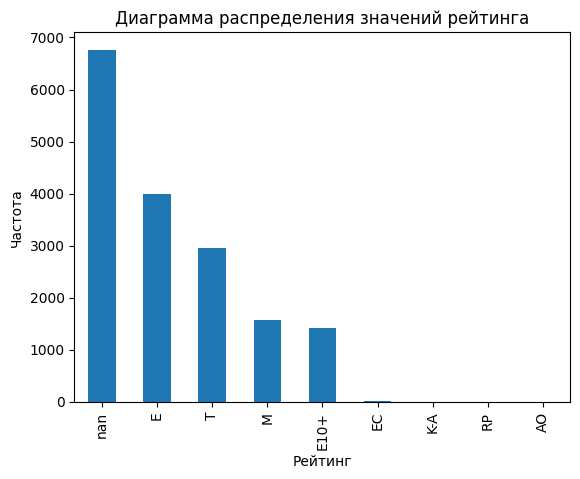

In [116]:
data.rating.value_counts(dropna=False).plot(kind='bar')
plt.title('Диаграмма распределения значений рейтинга')
plt.xlabel('Рейтинг')
plt.ylabel('Частота')
plt.show()

Получается, 9949 непустых значений и 6765 пустых.

Причем, вероятность того, что первое попавшееся пустое значение рейтинга будет одним из Е, Т, М, Е10+ , равно (3990+2961+1563+1420) / (3990+2961+1563+1420+8+3+3+1) = 99.8%

Значит, стоит ориентироваться именно на эти 4 значения при заполнении пустых значений рейтингов

Посмотрим, с чем коррелирует рейтинг. Для этого снова создадим вспомогательный словарь, потом вспомогательный столбец, потом посмотрим на корреляцию

In [122]:
data.rating.unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

In [119]:
# создадим вспомогательный словарь
rating_dict = {x:y for x,y in zip(data.rating.unique(), range(0,9))}

# создаем вспомогательный столбец
data['rating_id'] = data.rating.apply(lambda x: rating_dict[x])


In [121]:
data[['rating_id' ,'critic_score', 'platform_id', 'year_of_release', 'genre_id', 'total_sales']].corr()

,rating_id,critic_score,platform_id,year_of_release,genre_id,total_sales
rating_id,1.000000,0.050445,0.007921,-0.016478,0.219728,-0.004640
critic_score,0.050445,1.000000,0.173018,0.020163,-0.061894,0.218622
platform_id,0.007921,0.173018,1.000000,0.014709,0.059467,-0.087669
year_of_release,-0.016478,0.020163,0.014709,1.000000,-0.001563,0.014615
genre_id,0.219728,-0.061894,0.059467,-0.001563,1.000000,-0.063309
total_sales,-0.004640,0.218622,-0.087669,0.014615,-0.063309,1.000000


Да уж, рейтинг практически никак не связан ни с оценкой критиков, ни с платформой, годом выпуска или продажами. Зато хоть сколько-нибудь значимо связан с жанром.

Попробуем отсечь пустые значения и непопулярные значения рейтинга и посмотреть еще раз

In [124]:
data[(~data.rating.isna()) & (data.rating.isin(['E', 'M', 'T', 'E10+']))]\
    [['rating_id' ,'critic_score', 'platform_id', 'year_of_release', 'genre_id', 'total_sales']].corr()

,rating_id,critic_score,platform_id,year_of_release,genre_id,total_sales
rating_id,1.000000,0.016330,0.070736,-0.009972,0.340146,-0.028653
critic_score,0.016330,1.000000,0.192483,0.018857,-0.065408,0.254531
platform_id,0.070736,0.192483,1.000000,0.010231,0.003999,-0.080774
year_of_release,-0.009972,0.018857,0.010231,1.000000,-0.008563,0.019138
genre_id,0.340146,-0.065408,0.003999,-0.008563,1.000000,-0.035451
total_sales,-0.028653,0.254531,-0.080774,0.019138,-0.035451,1.000000


Ну, корреляция между рейтингом и жанром только усилилась



<font color='red'>Пока на подумать - может быть заменить пустые значения рейтинга пропорционально самым популярным значениям рейтингов , но с учетом корреляции по жанру? </font>

Сохраним в отдельный датафрейм таблицу с данными по самыми популярными типами рейтинга и жанру (за вычетом строк, где рейтинг пустой)

In [130]:
rating_genre_df = data[(~data.rating.isna()) & (data.rating.isin(['E', 'M', 'T', 'E10+']))]\
    [['rating_id','genre_id']]

посмотрим на график корреляции 

In [136]:
import plotly.express as px

px.scatter(rating_genre_df, x = "genre_id", y = "rating_id", trendline = "ols", trendline_color_override = "red",
           title='График корреляции между рейтингом и жанром')



На самом деле, никакой адекватной корреляции между рейтингом и жанром нет - и график это хорошо показывает.

<font color='red'>Вывод по пустым значениям рейтинга:</font> 

- их довольно большое число - больше 1/3 всех ячеек
- популярных типов рейтинга целых 4, любое пропущенное значение со значимой вероятностью может быть одним из этих типов
- корреляции между рейтингом и другими характеристиками игр нет никакой

<font color='green'>**Итог:** пустые значения рейтинга не трогаем. Недостаточно данных.</font> 

###### 2.2.7. Общий вывод по пропускам в данных

In [137]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16714 entries, 0 to 16713
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16714 non-null  object 
 1   platform         16714 non-null  object 
 2   year_of_release  16714 non-null  int64  
 3   genre            16714 non-null  object 
 4   na_sales         16714 non-null  float64
 5   eu_sales         16714 non-null  float64
 6   jp_sales         16714 non-null  float64
 7   other_sales      16714 non-null  float64
 8   critic_score     16714 non-null  float64
 9   user_score       10220 non-null  object 
 10  rating           9949 non-null   object 
 11  total_sales      16714 non-null  float64
 12  genre_id         16714 non-null  int64  
 13  platform_id      16714 non-null  int64  
 14  med_cr_score     14700 non-null  float64
 15  rating_id        16714 non-null  int64  
dtypes: float64(7), int64(4), object(5)
memory usage: 2.2+ MB


<font color='red'>Общий вывод по пропускам:</font>

1) Название игры - избавились от незначимой строки с пустым именем, значимую заменили на 'unknown'

2) Год выпуска - нашли взаимосвязь между названием (указанием года в названии) и годом выпуска: чаще всего это +1 год. Таким образом избавились от части пустых значений. Оставшиеся пустые значения заменили на 0(ноль) для удобства группировки, приведения данных в столбце к целочисленным значениям и для последующего анализа - запомним, что 0 означает **"год выпуска неизвестен"**

3) Жанр - та же строка с неизвестным названием игры. Заменили пустой жанр на 'unknown'

4) Оценка критиков - величина рапределена нормально + найдена корреляция оценки критиков с суммарными продажами и платформой, на которой выпускается игра. Поэтому пустые значения заменили на медианное значение оценки критиков, но с учетом платформы и суммарных продаж. Оставшиеся пустые значения, значения которых невозможно оценить применительно к платформе и суммарным продажам заполнили просто медианным значением

5) Оценка пользователей - величина дискретная. Самое частое значение - это 'tbd'-  отсутствие оценки (игра только выпущена или не набрана критическая масса оценок пользователей для формирования значения). Часть пустых значений заполнены по году выпуска (крайний год = 'tbd'), остальные - не заполнили, потому что риск промахнуться с выбором значения слишком велик

6) Рейтинг - пустых значений больше 30%, корреляции с прочими характеристиками нет. Есть 4 типа самых популярных рейтинга : Е, Т, М, Е10+. Но заполнять пустые значения одним из этих типов - неверно, риск ошибиться высок. Пустые значения не трогаем.



p.s. столбец с суммарными продажами по всем регионам создан ранее - 'total_sales'


#### Шаг 3. Исследовательский анализ данных

##### 3.1 Посмотрим, сколько игр выпускалось в разные годы. 

определим, важны ли данные за все периоды

In [142]:
data.groupby('year_of_release').agg({'name': 'count'}).\
    rename(columns={'name': 'games_per_year'}).sort_values('games_per_year', ascending= False)

,games_per_year
year_of_release,
2009,1428
2008,1428
2010,1256
2007,1199
2011,1136
2006,1008
2005,941
2002,829
2003,776


Данные не очень хорошо анализируются, посмотрим на гистограмму. 

Но перед этим найдем минимальное и минимальное значение (при этом помня, что 0 - это "год неизвестен")

In [144]:
data.year_of_release.max()

2016

In [146]:
# уберем ноль из рассмотрения

data.query('year_of_release !=0').year_of_release.min()

1980

<AxesSubplot: >

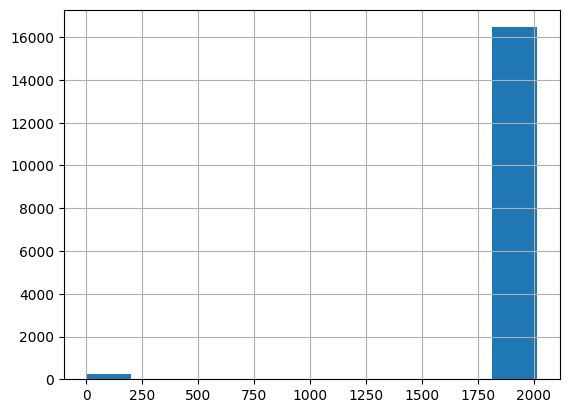

In [143]:
data.year_of_release.hist()

Теперь добавим границы, чтобы посмотреть как распределено число игр по годам

Text(0.5, 0, 'годы')

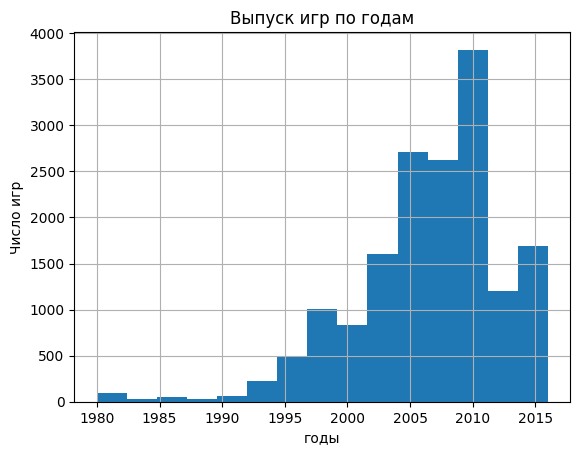

In [149]:
data.year_of_release.hist(range=(1980,2016), bins=15)

plt.title('Выпуск игр по годам')
plt.ylabel('Число игр')
plt.xlabel('годы')

Что точно видим:
- в 80-е было выпущено очень мало игр (не больше 50 в год)
- в середине 90-х начался практически экспоненциальный рост выпуска игр
- наибольший выпуск произошел между 2009 и 2011 годом - почти 4000 игр за период. Пик зафиксирован в 2008 и 2009 годах - 1428 игр/в год

- после 2011 года - резкий спад (выпуск сократился более, чем вдвое)

- 252 игры не имеют года выпуска


Посчитаем, какую долю продаж составляют игры с 1980 по 1994 включительно от всего периода продаж по выборке

3.1.1 по количеству

In [180]:
total_amount_sold = data.groupby('year_of_release').agg({'name': 'count'}).\
    rename(columns={'name': 'games_per_year'}).sort_values('games_per_year', ascending= False).sum().games_per_year

total_amount_sold

16714

In [181]:
total_amount_sold_untill_1994 = data.query("1980<= year_of_release <= 1994").\
    groupby('year_of_release').agg({'name': 'count'}).\
    rename(columns={'name': 'games_per_year'}).sort_values('games_per_year', ascending= False).sum().games_per_year

total_amount_sold_untill_1994

487

In [182]:
print(f'Доля числа проданных игр за период 1980-1994 составляет {round(total_amount_sold_untill_1994/total_amount_sold*100,1)}%')

Доля проданных игр за период 1980-1994 составляет 2.9%


3.1.1 по суммарным продажам

In [183]:
total_sales_all_time = data.groupby('year_of_release').agg({'total_sales': 'sum'}).\
    rename(columns={'total_sales': 'total_sales_per_year'}).sort_values('total_sales_per_year', ascending= False)\
        .sum().total_sales_per_year

total_sales_all_time

8915.679999999998

In [185]:
total_sales_untill_1994 = data.query("1980<= year_of_release <= 1994").\
    groupby('year_of_release').agg({'total_sales': 'sum'}).\
    rename(columns={'total_sales': 'total_sales_per_year'}).sort_values('total_sales_per_year', ascending= False)\
        .sum().total_sales_per_year

total_sales_untill_1994

661.8499999999999

In [186]:
print(f'Доля суммарных продаж игр за период 1980-1994 составляет {round(total_sales_untill_1994/total_sales_all_time*100,1)}%')

Доля суммарных продаж игр за период 1980-1994 составляет 7.4%


Итак, 
- суммарный выпуск игр до 1995 составляет менее 3% от общего числа за все время выборки
- суммарная выручка - менее 8%

<font color='red'>Вывод:</font>
выпуск игр до 1995 года малозначим в масштабах выпуска за  36 лет (1980 - 2016)

##### 3.2 Посмотрим, как менялись продажи по платформам. 

Выберем платформы с наибольшими суммарными продажами и построим распределение по годам. 

Цель: выяснить, за какой характерный срок появляются новые и исчезают старые платформы

Text(0.5, 0, 'платформа')

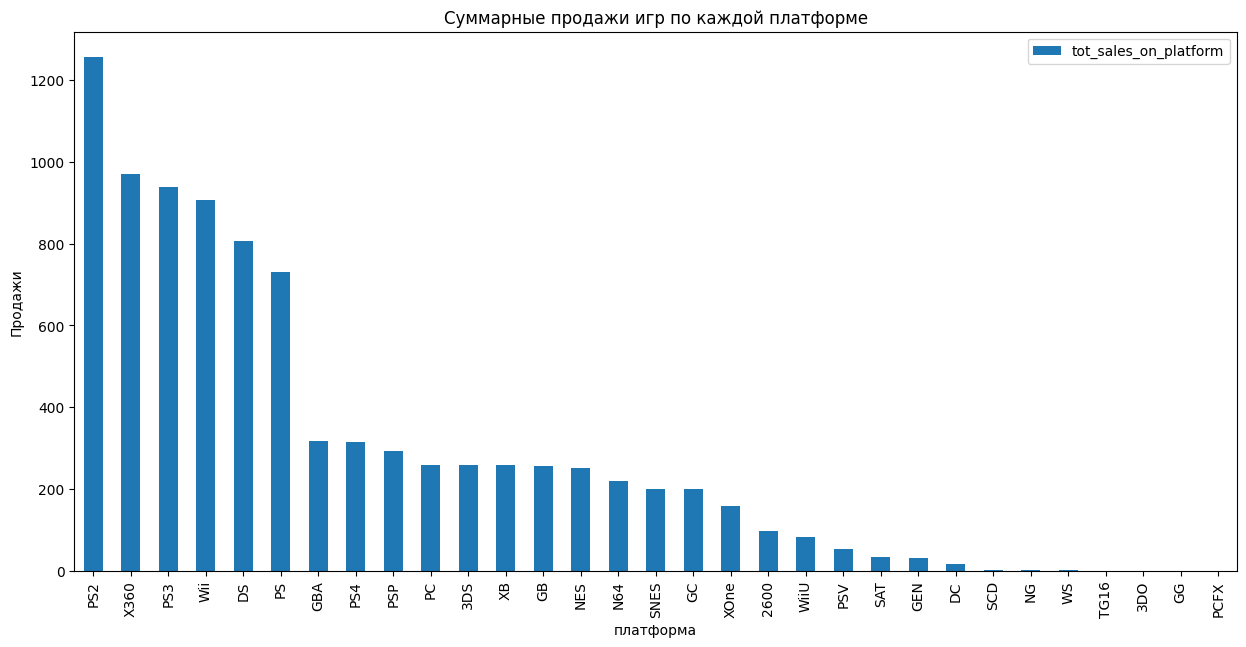

In [156]:
data.groupby('platform').agg({'total_sales': 'sum'}).\
    rename(columns={'total_sales': 'tot_sales_on_platform'}).sort_values('tot_sales_on_platform', ascending = False).\
    plot(kind='bar', figsize=(15,7))

plt.title('Суммарные продажи игр по каждой платформе')
plt.ylabel('Продажи')
plt.xlabel('платформа')

Что ж, в топ-6 продаж очевидно входят:
1) Playstation 2
2) X-box 360
3) Playstation 3
4) Wii (Игровая приставка 7-го поколения, 5-я домашняя консоль фирмы Nintendo и наследница Nintendo GameCube.)
5) Nintendo DS (карманная игровая консоль)
6) Playstation 1 (PS)

Построим распределения продаж каждой из 6 самых популярных платформ по годам

###### 3.2.1 Продажи игр на платформе Playstation-2 (PS2)

Text(0.5, 0, 'годы')

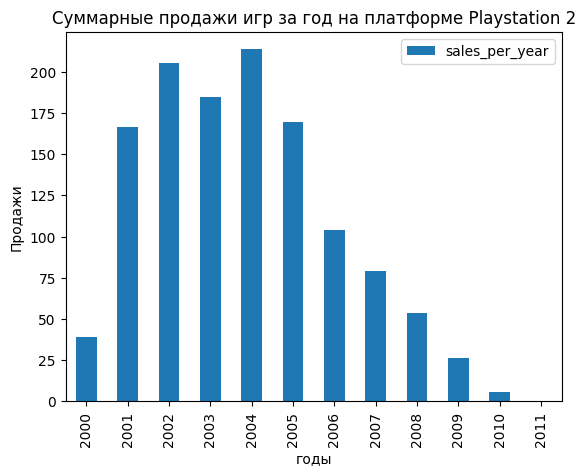

In [161]:
data.query('platform == "PS2"').\
    groupby('year_of_release').agg({'total_sales': 'sum'}).\
    rename(columns={'total_sales': 'sales_per_year'}).\
    query('year_of_release !=0').\
    plot(kind='bar')

plt.title('Суммарные продажи игр за год на платформе Playstation 2')
plt.ylabel('Продажи')
plt.xlabel('годы')

Очевидный спрос - с 2001 по 2005 (5 лет), дальше спад.

Время "жизни" - с 2000 по 2010 (около 11 лет)

###### 3.2.2 Продажи игр на платформе X-box 360 (X360)

Text(0.5, 0, 'годы')

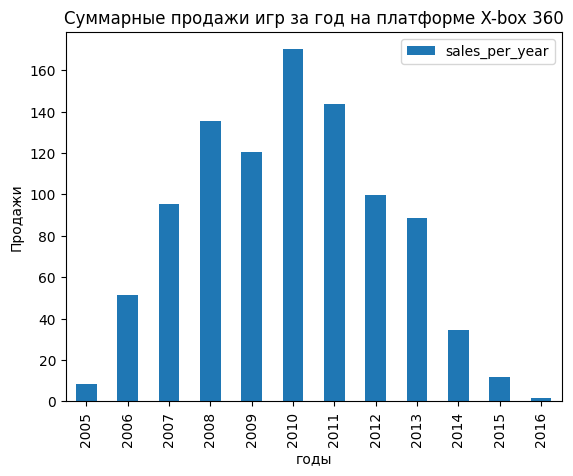

In [162]:
data.query('platform == "X360"').\
    groupby('year_of_release').agg({'total_sales': 'sum'}).\
    rename(columns={'total_sales': 'sales_per_year'}).\
    query('year_of_release !=0').\
    plot(kind='bar')

plt.title('Суммарные продажи игр за год на платформе X-box 360')
plt.ylabel('Продажи')
plt.xlabel('годы')

Очевидный спрос - с 2007 по 2013 (7 лет), дальше спад.

Время "жизни" - с 2005 по 2016 (около 11 лет)

###### 3.2.3 Продажи игр на платформе Playsation 3 (PS3)

Text(0.5, 0, 'годы')

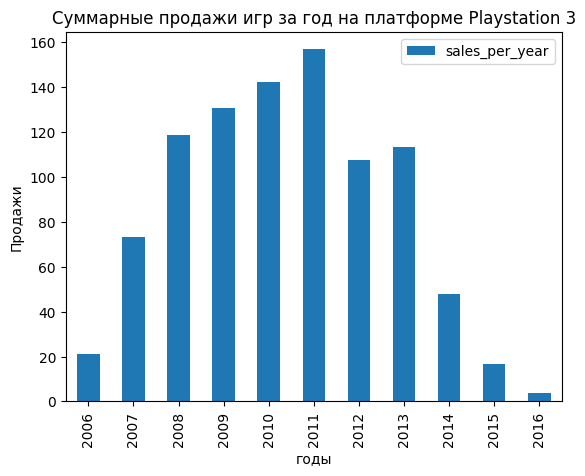

In [163]:
data.query('platform == "PS3"').\
    groupby('year_of_release').agg({'total_sales': 'sum'}).\
    rename(columns={'total_sales': 'sales_per_year'}).\
    query('year_of_release !=0').\
    plot(kind='bar')

plt.title('Суммарные продажи игр за год на платформе Playstation 3')
plt.ylabel('Продажи')
plt.xlabel('годы')

Очевидный спрос - с 2008 по 2013 (6 лет), дальше спад.

Время "жизни" - с 2006 по 2016 (около 11 лет)

###### 3.2.4 Продажи игр на платформе Wii

Text(0.5, 0, 'годы')

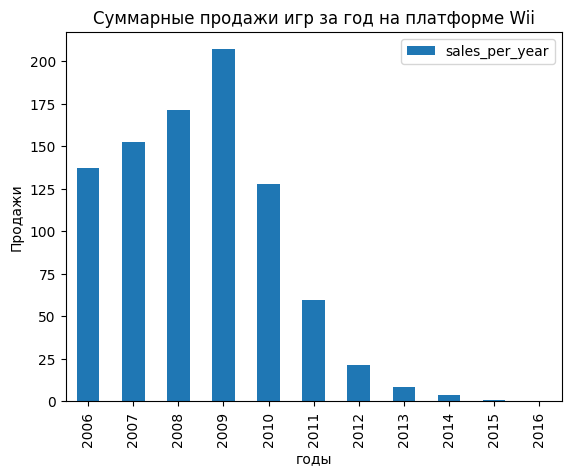

In [164]:

data.query('platform == "Wii"').\
    groupby('year_of_release').agg({'total_sales': 'sum'}).\
    rename(columns={'total_sales': 'sales_per_year'}).\
    query('year_of_release !=0').\
    plot(kind='bar')

plt.title('Суммарные продажи игр за год на платформе Wii')
plt.ylabel('Продажи')
plt.xlabel('годы')


Очевидный спрос - с 2006 по 2010 (5 лет), дальше спад.

Время "жизни" - с 2006 по 2015 (около 10 лет)

###### 3.2.5 Продажи игр на платформе Nintendo DS (DS)



Text(0.5, 0, 'годы')

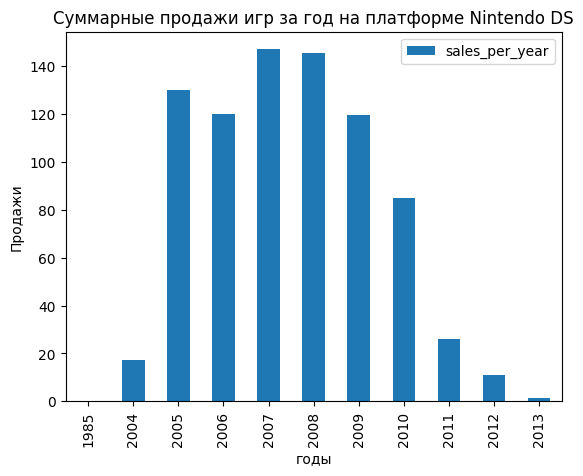

In [165]:
data.query('platform == "DS"').\
    groupby('year_of_release').agg({'total_sales': 'sum'}).\
    rename(columns={'total_sales': 'sales_per_year'}).\
    query('year_of_release !=0').\
    plot(kind='bar')

plt.title('Суммарные продажи игр за год на платформе Nintendo DS')
plt.ylabel('Продажи')
plt.xlabel('годы')

Очевидный спрос - с 2005 по 2010 (6 лет), дальше спад.

Время "жизни" - с 2004 по 2013 (около 10 лет)

###### 3.2.6 Продажи игр на платформе Playstation-1 (PS)



Text(0.5, 0, 'годы')

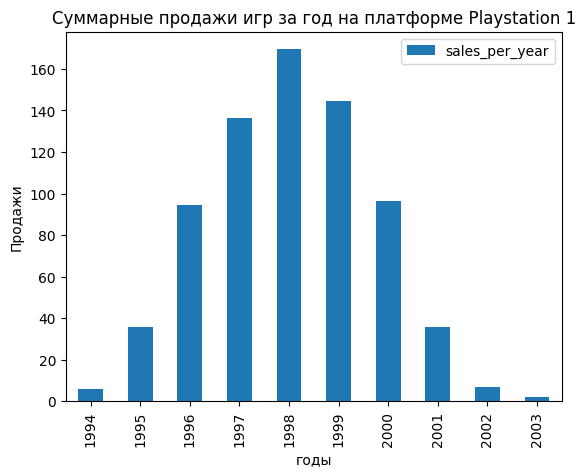

In [166]:
data.query('platform == "PS"').\
    groupby('year_of_release').agg({'total_sales': 'sum'}).\
    rename(columns={'total_sales': 'sales_per_year'}).\
    query('year_of_release !=0').\
    plot(kind='bar')

plt.title('Суммарные продажи игр за год на платформе Playstation 1')
plt.ylabel('Продажи')
plt.xlabel('годы')

Очевидный спрос - с 1996 по 2000 (5 лет), дальше спад.

Время "жизни" - с 1994 по 2003 (около 10 лет)

<font color='red'>**Вывод: платформа игры существует примерно 10 лет, из которых в среднем 5 лет находится на пике популярности**</font>

##### 3.3 Сделаем срез ***актуальных данных***

Актуальный период определим исходя из предыдущих шагов исследования. Основной фактор — эти данные помогут построить прогноз на 2017 год.

Учитывая выводы в пункте 3.1 , а также время "жизни" самых популярных платформ акуальным будем считать период после 1994 года

In [187]:
work_data = data.query('year_of_release>1994')
work_data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales,genre_id,platform_id,med_cr_score,rating_id
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8,E,82.54,0,0,76.0,0
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52,2,0,82.0,0
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8,E,32.77,0,0,80.0,0
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,67.0,NaN,NaN,31.38,3,2,NaN,1
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,29.80,1,3,89.0,0


In [188]:
work_data.shape

(15975, 16)

##### 3.4 Посмотрим, какие платформы лидируют по продажам, растут или падают.

Выберем несколько потенциально прибыльных платформ.

Text(0.5, 0, 'платформа')

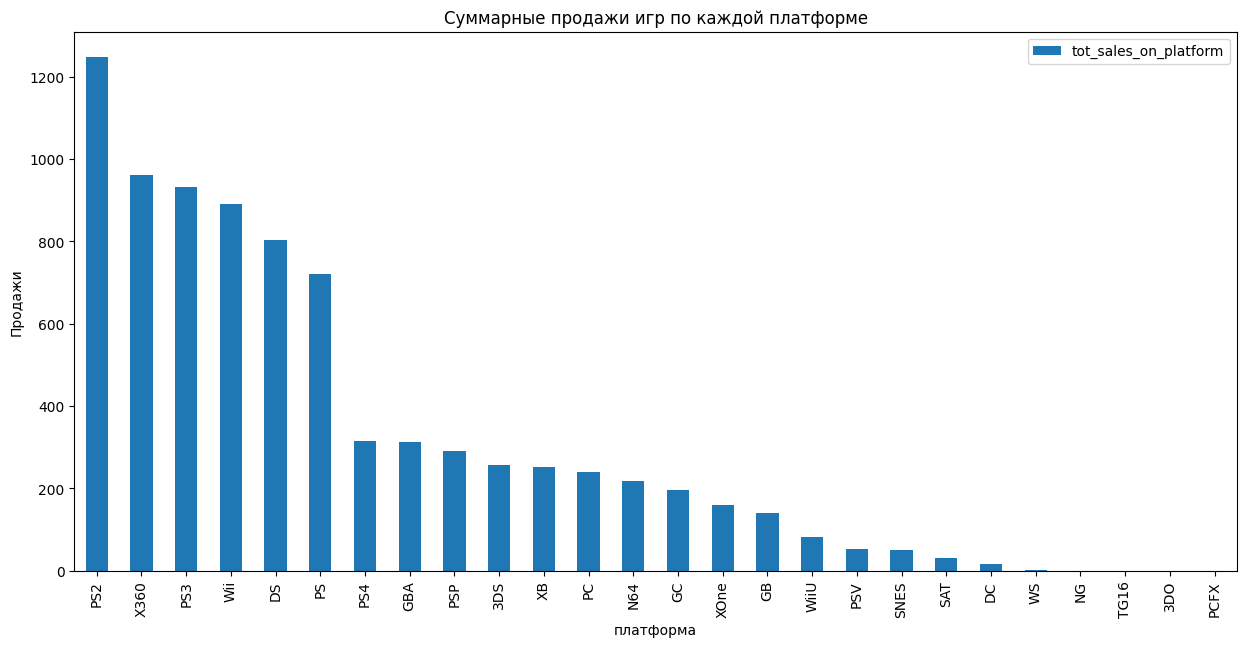

In [189]:
work_data.groupby('platform').agg({'total_sales': 'sum'}).\
    rename(columns={'total_sales': 'tot_sales_on_platform'}).sort_values('tot_sales_on_platform', ascending = False).\
    plot(kind='bar', figsize=(15,7))

plt.title('Суммарные продажи игр по каждой платформе')
plt.ylabel('Продажи')
plt.xlabel('платформа')

Топ-6 платформ, на которых выпускаются игры, не изменился.

Но мы помним, что:
- все эти платформы потеряли свой пик популярности за несколько лет до 2016, а некоторые вообще перестали приносить прибыль (см шаг 3.2)
- продажи игр в принципе начали существенно снижаться после 2011 года

Так может быть посмотреть, как распределится популярность платформ за последние 10 лет - с 2005 по 2016?

Text(0.5, 0, 'платформа')

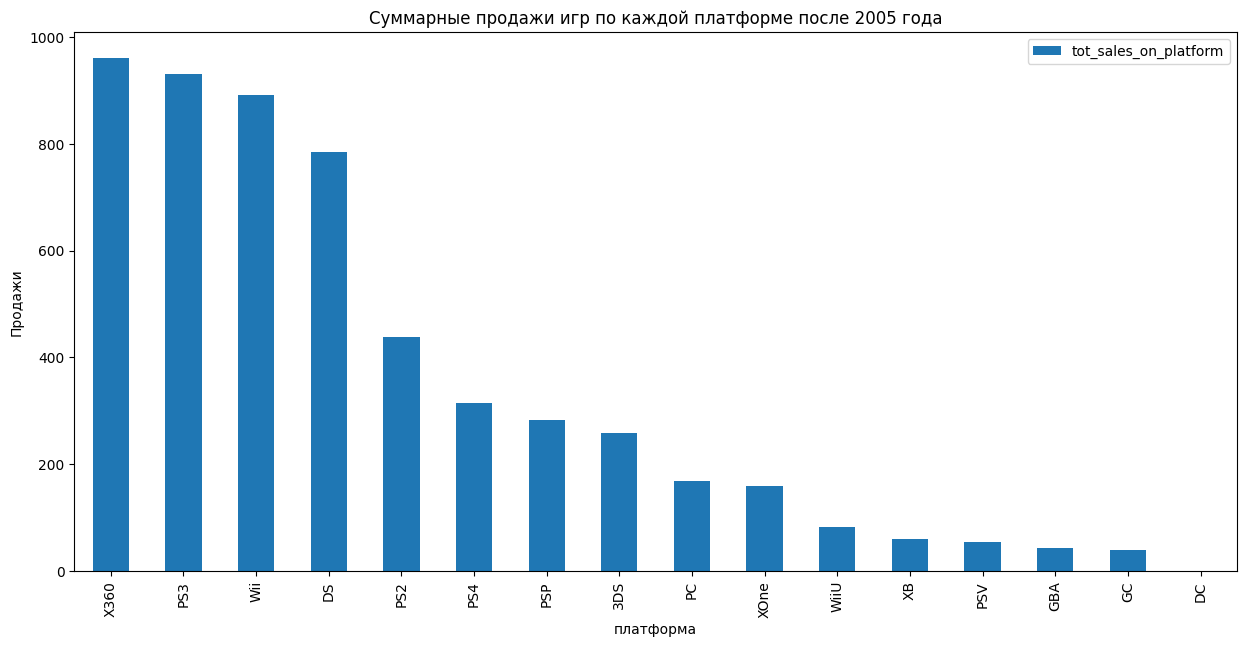

In [190]:
work_data.query('year_of_release >=2005').\
    groupby('platform').agg({'total_sales': 'sum'}).\
    rename(columns={'total_sales': 'tot_sales_on_platform'}).sort_values('tot_sales_on_platform', ascending = False).\
    plot(kind='bar', figsize=(15,7))

plt.title('Суммарные продажи игр по каждой платформе после 2005 года')
plt.ylabel('Продажи')
plt.xlabel('платформа')

Так, а если за последние 5 лет?

Text(0.5, 0, 'платформа')

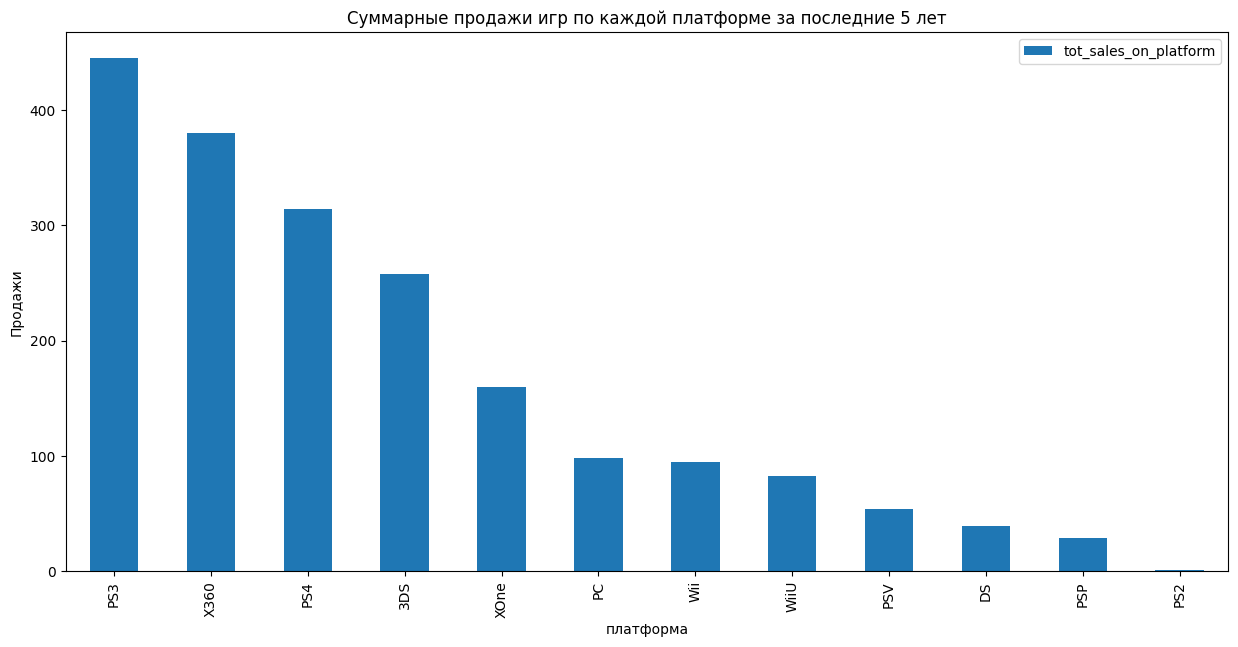

In [191]:
work_data.query('year_of_release >=2011').\
    groupby('platform').agg({'total_sales': 'sum'}).\
    rename(columns={'total_sales': 'tot_sales_on_platform'}).sort_values('tot_sales_on_platform', ascending = False).\
    plot(kind='bar', figsize=(15,7))

plt.title('Суммарные продажи игр по каждой платформе за последние 5 лет')
plt.ylabel('Продажи')
plt.xlabel('платформа')

Так, распределение изменилось. Посмотрим, какие платформы набирают популярность, а какие -теряют 

###### 3.4.1 Продажи игр на платформе Playstation-3 (PS3)


Text(0.5, 0, 'годы')

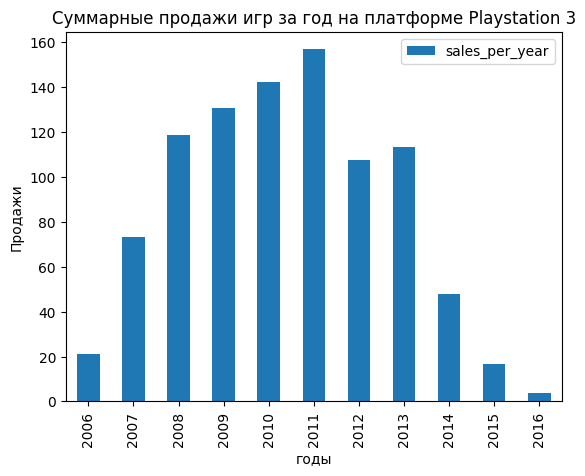

In [192]:
work_data.query('platform == "PS3"').\
    groupby('year_of_release').agg({'total_sales': 'sum'}).\
    rename(columns={'total_sales': 'sales_per_year'}).\
    query('year_of_release !=0').\
    plot(kind='bar')

plt.title('Суммарные продажи игр за год на платформе Playstation 3')
plt.ylabel('Продажи')
plt.xlabel('годы')

C 2014 года наблюдается заметный спад.

###### 3.4.2 Продажи игр на платформе X-box 360 (X360)



Text(0.5, 0, 'годы')

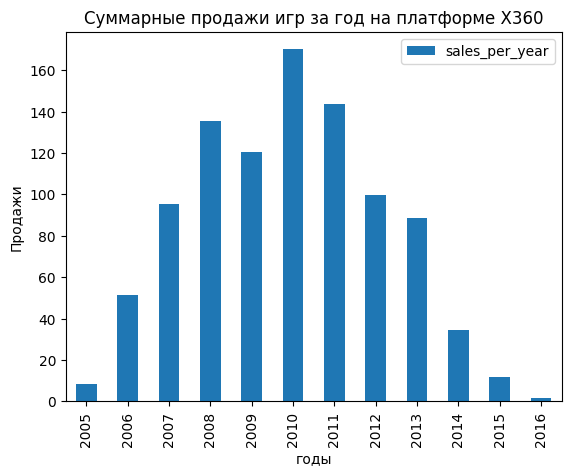

In [193]:
work_data.query('platform == "X360"').\
    groupby('year_of_release').agg({'total_sales': 'sum'}).\
    rename(columns={'total_sales': 'sales_per_year'}).\
    query('year_of_release !=0').\
    plot(kind='bar')

plt.title('Суммарные продажи игр за год на платформе X360')
plt.ylabel('Продажи')
plt.xlabel('годы')


C 2014 года наблюдается заметный спад.

###### 3.4.3 Продажи игр на платформе Playstation-4 (PS4)



Text(0.5, 0, 'годы')

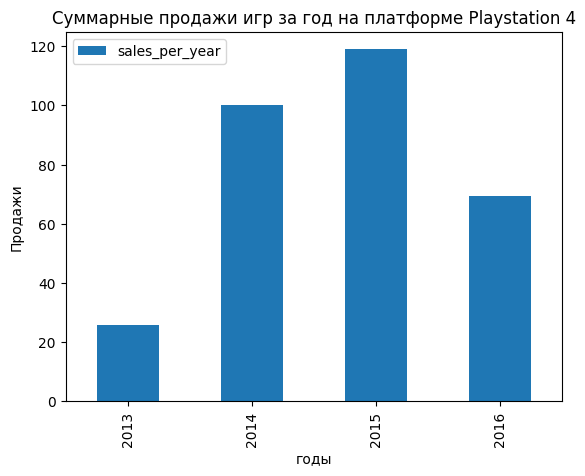

In [194]:
work_data.query('platform == "PS4"').\
    groupby('year_of_release').agg({'total_sales': 'sum'}).\
    rename(columns={'total_sales': 'sales_per_year'}).\
    query('year_of_release !=0').\
    plot(kind='bar')

plt.title('Суммарные продажи игр за год на платформе Playstation 4')
plt.ylabel('Продажи')
plt.xlabel('годы')

вот! уже интереснеее: у платформы Playstation 4 наблюдается рост с 2013 по 2015 год. А учитывая, что данные за 2016 год могут бять неполными (из условия), значит можно предполагать, что тендеция роста сохраняется

###### 3.4.4 Продажи игр на платформе Nintendo 3DS  (3DS)



Text(0.5, 0, 'годы')

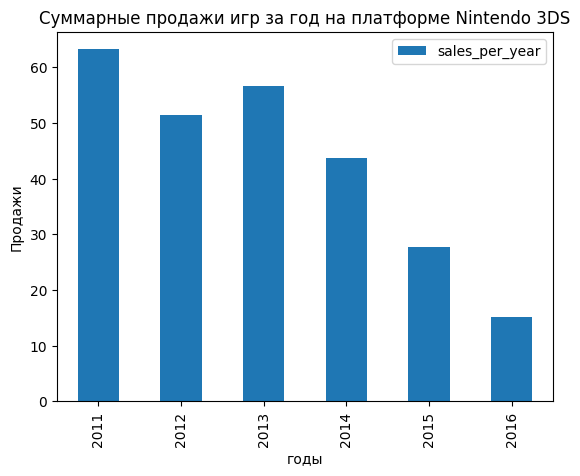

In [195]:
work_data.query('platform == "3DS"').\
    groupby('year_of_release').agg({'total_sales': 'sum'}).\
    rename(columns={'total_sales': 'sales_per_year'}).\
    query('year_of_release !=0').\
    plot(kind='bar')

plt.title('Суммарные продажи игр за год на платформе Nintendo 3DS')
plt.ylabel('Продажи')
plt.xlabel('годы')


C 2014 года наблюдается спад.

###### 3.4.5 Продажи игр на платформе  (XOne)


Text(0.5, 0, 'годы')

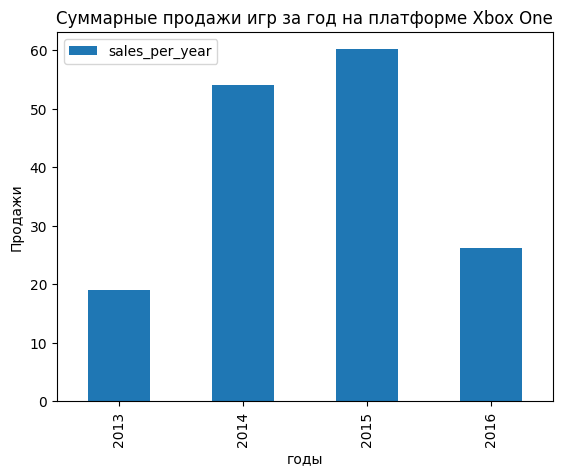

In [196]:
work_data.query('platform == "XOne"').\
    groupby('year_of_release').agg({'total_sales': 'sum'}).\
    rename(columns={'total_sales': 'sales_per_year'}).\
    query('year_of_release !=0').\
    plot(kind='bar')

plt.title('Суммарные продажи игр за год на платформе Xbox One')
plt.ylabel('Продажи')
plt.xlabel('годы')

Xbox One аналогично Playstaion 4 - имеет хорошую тенденцию роста с 2013 года

###### 3.4.6 Продажи игр на платформе персональных компьютеров (PС)


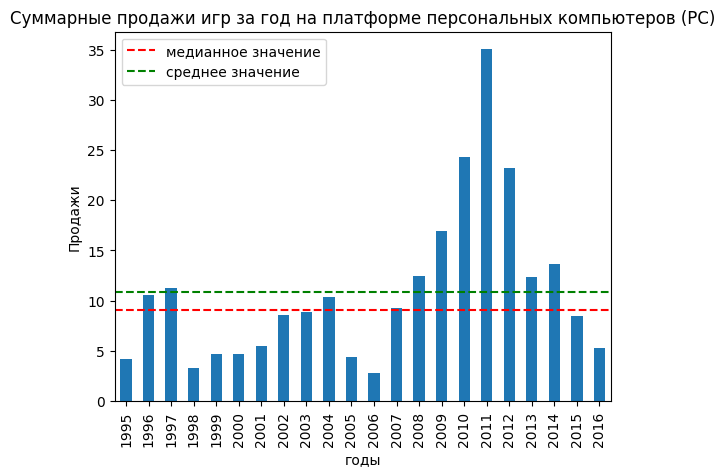

In [217]:
work_data.query('platform == "PC"').\
    groupby('year_of_release').agg({'total_sales': 'sum'}).\
    rename(columns={'total_sales': 'sales_per_year'}).\
    query('year_of_release !=0').\
    plot(kind='bar')

# задаем диапазон значений для построения среднего и медианы
x = work_data.query('platform == "PC"').year_of_release.unique()

# считаем среднее
pc_mean = work_data.query('platform == "PC"').\
    groupby('year_of_release').agg({'total_sales': 'sum'}).\
    rename(columns={'total_sales': 'sales_per_year'}).\
    query('year_of_release !=0').mean().sales_per_year

# считаем медиану
pc_median = work_data.query('platform == "PC"').\
    groupby('year_of_release').agg({'total_sales': 'sum'}).\
    rename(columns={'total_sales': 'sales_per_year'}).\
    query('year_of_release !=0').median().sales_per_year

# наносим на график среднее и  медиану
ax_mean = plt.axhline(pc_mean, linestyle='dashed', color='g')
ax_median = plt.axhline(pc_median, linestyle='dashed', color='r')

plt.title('Суммарные продажи игр за год на платформе персональных компьютеров (PС)')
plt.ylabel('Продажи')
plt.xlabel('годы')

plt.legend([ax_median, ax_mean], [ 'медианное значение','среднее значение'])

plt.show()

Продажи игр для персональных компьютеров выглядят сложнее:
- продаются с 1995 по настоящее время
- имели пиковые значения с 2010 по 2012
- среднее и медианное значение за весь период в общем-то несильно отличаются
- продажи последних 4 лет несильно отличаются от средних за весь период

Вывод: довольно стабильная прибыль от продаж игр для персональных компьютеров, стоит учитывать при планировании на будущий год

###### 3.4.7 Продажи игр на платформе Wii (Wii)



Text(0.5, 0, 'годы')

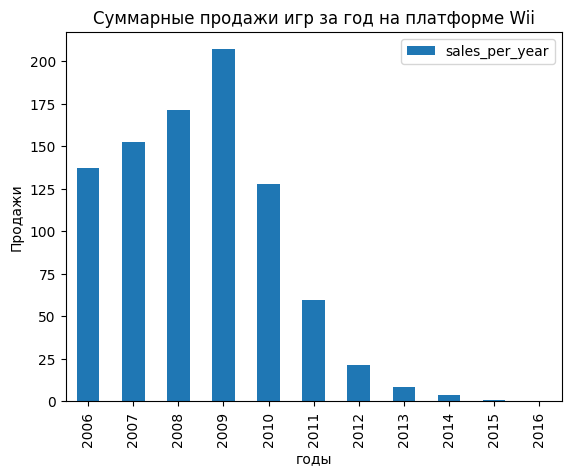

In [218]:
work_data.query('platform == "Wii"').\
    groupby('year_of_release').agg({'total_sales': 'sum'}).\
    rename(columns={'total_sales': 'sales_per_year'}).\
    query('year_of_release !=0').\
    plot(kind='bar')

plt.title('Суммарные продажи игр за год на платформе Wii')
plt.ylabel('Продажи')
plt.xlabel('годы')


Продажи заметно падают с 2011 года, эта платформа не интересна

###### 3.4.8 Продажи игр на платформе WiiU



Text(0.5, 0, 'годы')

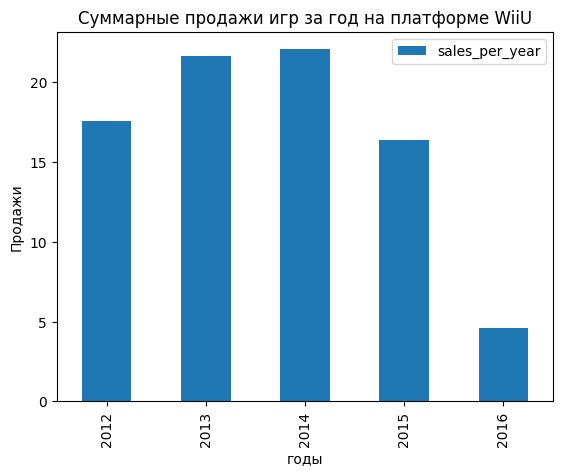

In [219]:
work_data.query('platform == "WiiU"').\
    groupby('year_of_release').agg({'total_sales': 'sum'}).\
    rename(columns={'total_sales': 'sales_per_year'}).\
    query('year_of_release !=0').\
    plot(kind='bar')

plt.title('Суммарные продажи игр за год на платформе WiiU')
plt.ylabel('Продажи')
plt.xlabel('годы')

Снижение наблюдалось в прошлом году относительно пикового в 2014 году. Однозначно сказать как поведут себя продажи после - сложно. Но все же тенденция такова, что будет нкоторое снижение.

К тому же продажи в принципе не высоки относительно других платформ, поэтому скорее не стоит ее выбирать 

###### 3.4.9 Продажи игр на платформе PlayStation Vita (PSV) - портативная игровая консоль



Text(0.5, 0, 'годы')

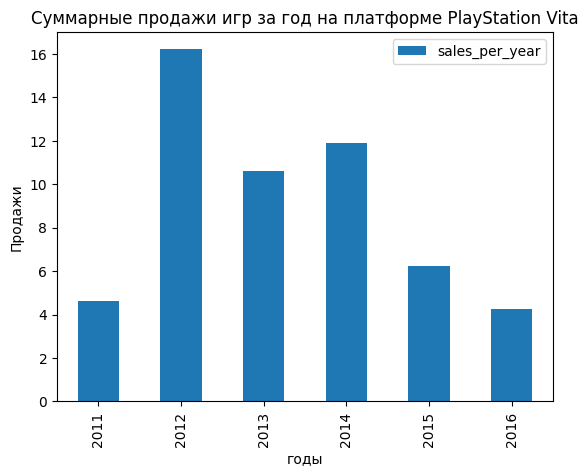

In [220]:
work_data.query('platform == "PSV"').\
    groupby('year_of_release').agg({'total_sales': 'sum'}).\
    rename(columns={'total_sales': 'sales_per_year'}).\
    query('year_of_release !=0').\
    plot(kind='bar')

plt.title('Суммарные продажи игр за год на платформе PlayStation Vita')
plt.ylabel('Продажи')
plt.xlabel('годы')

Хоть это и портативная игровая консоль, но все же спад интереса к платформе заметен. можно ожидать снижения и дальше

###### 3.4.10 Продажи игр на платформе DS

смотрели ранее - пик ее популярности прошел

###### 3.4.11 Продажи игр на платформе PlayStation Portable (PSP)


Text(0.5, 0, 'годы')

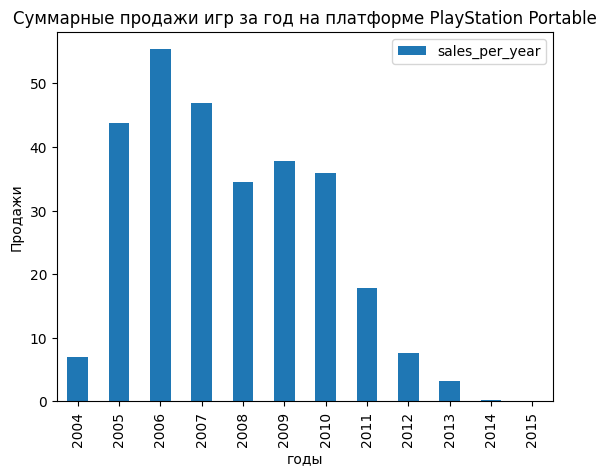

In [221]:
work_data.query('platform == "PSP"').\
    groupby('year_of_release').agg({'total_sales': 'sum'}).\
    rename(columns={'total_sales': 'sales_per_year'}).\
    query('year_of_release !=0').\
    plot(kind='bar')

plt.title('Суммарные продажи игр за год на платформе PlayStation Portable')
plt.ylabel('Продажи')
plt.xlabel('годы')

Да, от этой платформы тоже не стоит ждать ничего хорошего - пик популярности прошел

###### 3.4.12 Подведем итоги по платформам

1) Топ самых продаваемых платформ за весь период
    - Playstation 2
    - X-box 360
    - Playstation 3
    - Wii (Игровая приставка 7-го поколения, 5-я домашняя консоль фирмы Nintendo и наследница Nintendo GameCube.)
    - Nintendo DS (карманная игровая консоль)
    - Playstation 1 (PS)



2) Общая средняя продолжительность популярности платформы - около 5 лет

3) Среди самых популярных за последние пять лет присутствует большое число платформ: некоторые из них на спаде, другие на подъеме.

На этом основании <font color='green'>привлекательными платформами на следующий год</font> являются:

    - Playstation 4 (PS4)
    - Xbox One (XOne)
    - Персональные компьютеры (PC)
    


##### 3.5 Построим box-plot (график «ящик с усами») по глобальным продажам игр в разбивке по платформам.

In [223]:
work_data.query('platform.isin(["PS4", "XOne", "PC"])').\
    groupby('platform').agg({'total_sales':'sum'})

,total_sales
platform,
PC,240.14
PS4,314.14
XOne,159.32


In [242]:
import seaborn as sns

Создадим вспомогательный датафрейм для удобства - там соберем только три выбранные платформы и столбец с продажами

In [244]:
popular_platform_sales_df=  work_data.query('platform.isin(["PS4", "XOne", "PC"])')[['platform', 'total_sales']]

In [245]:
popular_platform_sales_df.head()

,platform,total_sales
31,PS4,14.63
42,PS4,12.62
77,PS4,8.58
85,PC,8.01
87,PS4,7.98


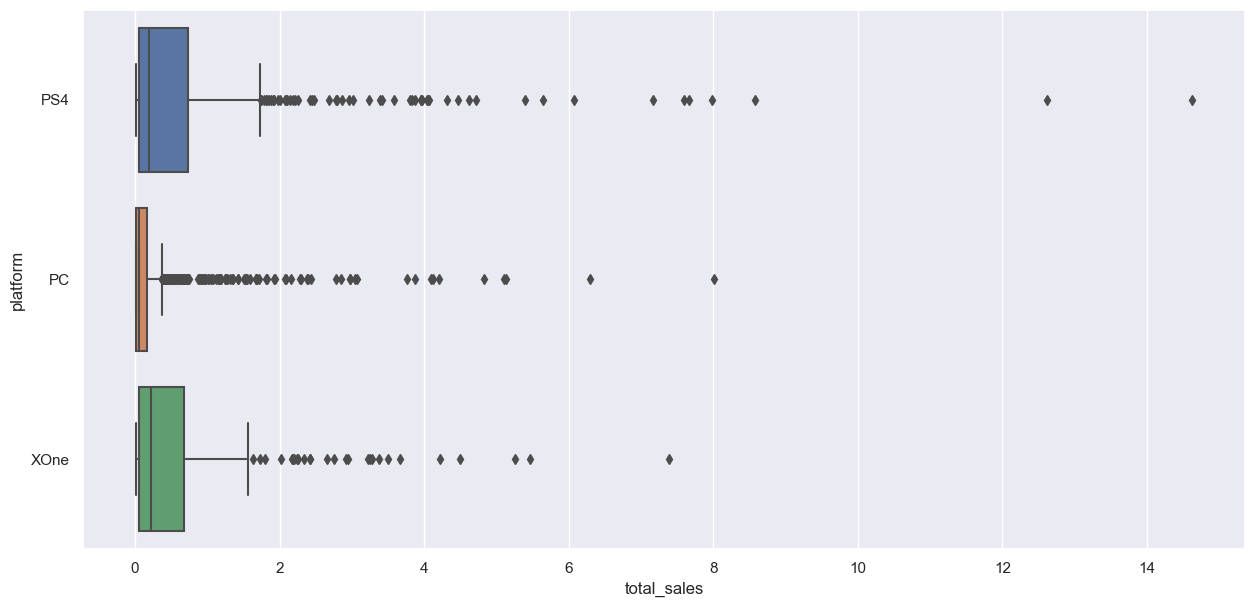

In [262]:
sns.boxplot(x='total_sales', y='platform', data=popular_platform_sales_df, orient='h')

# зададим размер графика для читабельности
sns.set(rc={'figure.figsize': (7,7)}) 

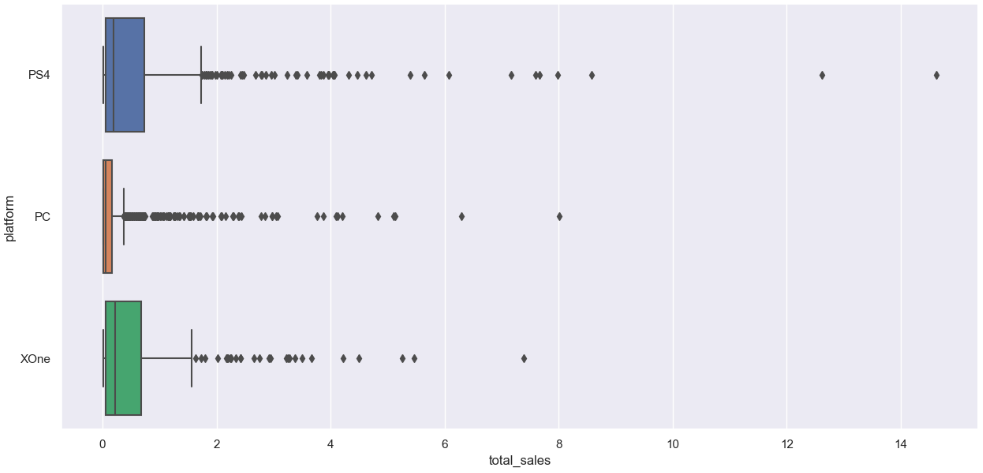

Теперь посмотрим на эти графики по отдельности для каждой платформы

###### 3.5.1 Box-plot PS4 

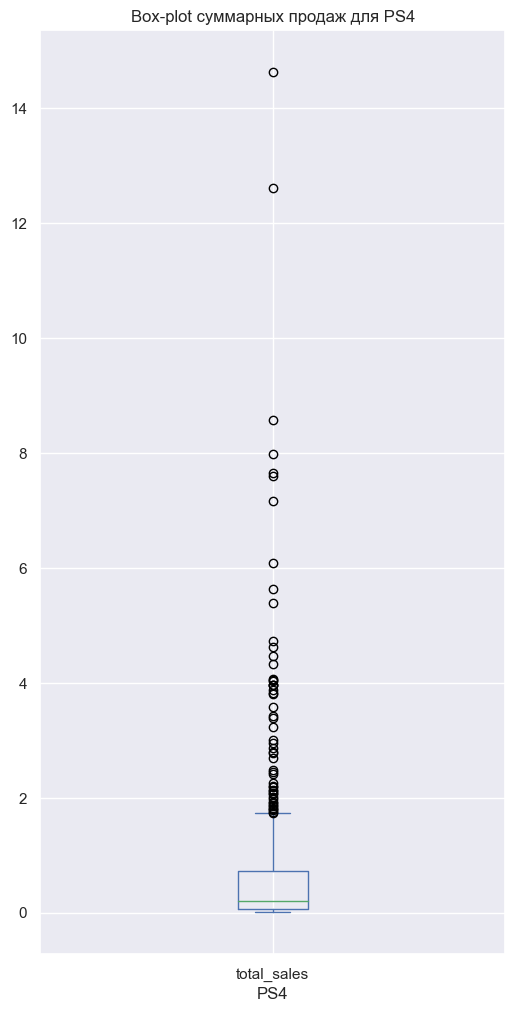

In [272]:
work_data.query('platform =="PS4"').total_sales.\
    plot(kind='box', figsize=(6,12), grid= True, xlabel= 'PS4')

plt.title('Box-plot суммарных продаж для PS4')

plt.show()



In [270]:
work_data.query('platform =="PS4"').total_sales.describe()

count    392.000000
mean       0.801378
std        1.609456
min        0.010000
25%        0.060000
50%        0.200000
75%        0.730000
max       14.630000
Name: total_sales, dtype: float64

In [275]:
print(f'Межквартильный размах равен {round(0.73-0.06, 2)}')


Межквартильный размах равен 0.67


In [278]:
# считаем размер усов вручную
print(f'размер уса равен полтора межквартильного размаха = {round(0.67*1.5,2)}')

print(f'нижняя граница усов = последняя базовая величина, которая не меньше {round(0.06 - 0.67*1.5,2)} - разумеется это 0')

print(f'верхняя граница усов  = последняя базовая величина, которая не больше {0.73 + 0.67*1.5}')

размер уса равен полтора межквартильного размаха = 1.01
нижняя граница усов = последняя базовая величина, которая не меньше -0.95 - разумеется это 0
верхняя граница усов  = последняя базовая величина, которая не больше 1.735


Вывод по box-plot для PS4:
- половина всех значений суммарных продаж лежит в пределах от 60 до 730 тыс
- все продажи объемом более 1,74 млн - это выбросы: слишком редкие значения и не могут адекватно описывать продажи по платформе
- в пределах значимости - продажи игры на это платформе объемом не более 1,74 млн копий

###### 3.5.2 Box-plot XOne


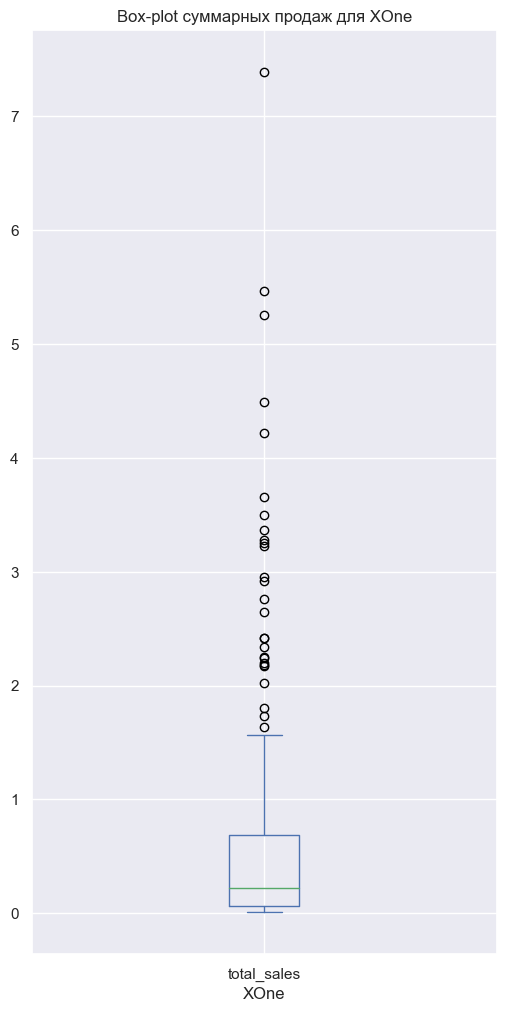

In [279]:
work_data.query('platform =="XOne"').total_sales.\
    plot(kind='box', figsize=(6,12), grid= True, xlabel= 'XOne')

plt.title('Box-plot суммарных продаж для XOne')

plt.show()




In [281]:
work_data.query('platform =="XOne"').total_sales.describe()


count    247.000000
mean       0.645020
std        1.036139
min        0.010000
25%        0.060000
50%        0.220000
75%        0.685000
max        7.390000
Name: total_sales, dtype: float64

In [282]:
print(f'Межквартильный размах равен {round(0.685-0.06, 2)}')



Межквартильный размах равен 0.62


In [284]:
# считаем размер усов вручную
print(f'размер уса равен полтора межквартильного размаха = {round(0.62*1.5,2)}')

print(f'нижняя граница усов = последняя базовая величина, которая не меньше {round(0.06 - 0.62*1.5,2)} - разумеется это 0')

print(f'верхняя граница усов  = последняя базовая величина, которая не больше {round(0.685 + 0.67*1.5, 2)}')


размер уса равен полтора межквартильного размаха = 0.93
нижняя граница усов = последняя базовая величина, которая не меньше -0.87 - разумеется это 0
верхняя граница усов  = последняя базовая величина, которая не больше 1.69


Вывод по box-plot для XOne:
- половина всех значений суммарных продаж лежит в пределах от 60 до 685 тыс
- все продажи объемом более 1,7 млн - это выбросы: слишком редкие значения и не могут адекватно описывать продажи по платформе
- в пределах значимости - продажи игры на это платформе объемом не более 1,7 млн копий

###### 3.5.3 Box-plot PC



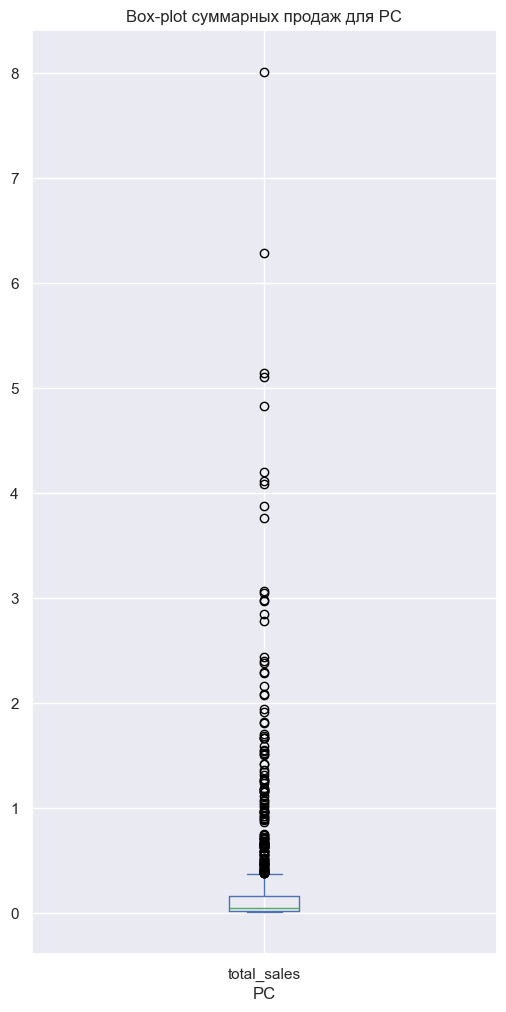

In [286]:
work_data.query('platform =="PC"').total_sales.\
    plot(kind='box', figsize=(6,12), grid= True, xlabel= 'PC')

plt.title('Box-plot суммарных продаж для PC')

plt.show()



In [288]:


work_data.query('platform =="PC"').total_sales.describe()



count    945.000000
mean       0.254116
std        0.658344
min        0.010000
25%        0.020000
50%        0.050000
75%        0.160000
max        8.010000
Name: total_sales, dtype: float64

In [289]:
print(f'Межквартильный размах равен {round(0.16-0.06, 2)}')



Межквартильный размах равен 0.1


In [291]:

# считаем размер усов вручную
print(f'размер уса равен полтора межквартильного размаха = {round(0.1*1.5,2)}')

print(f'нижняя граница усов = последняя базовая величина, которая не меньше {round(0.02 - 0.1*1.5,2)} - разумеется, это 0')

print(f'верхняя граница усов  = последняя базовая величина, которая не больше {round(0.16+ 0.1*1.5, 2)}')


размер уса равен полтора межквартильного размаха = 0.15
нижняя граница усов = последняя базовая величина, которая не меньше -0.13 - разумеется, это 0
верхняя граница усов  = последняя базовая величина, которая не больше 0.31



Вывод по box-plot для PC:
- половина всех значений суммарных продаж лежит в пределах от 20 до 160 тыс
- все продажи объемом более 310 тыс - это выбросы: слишком редкие значения и не могут адекватно описывать продажи по платформе
- в пределах значимости - продажи игры на этой платформе объемом не более 310 тыс копий

##### 3.6 Посмотрим как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. 

Построим диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами

Корреляция между оценками пользователей и критиков и суммарными продажами была посчитана в пункте 2.2.5

Был получен закономерный результат - оценка пользователей неплохо коррелирует с оценкой критиков, суммарные продажи несколько слабее , но все же коррелируют с оценками.

Вопспроизведем корреляцию и диаграмму рассеияние для одной перспективной платформы - возьмем самую продаваемую - PS4

In [293]:
work_data.query('platform == "PS4"').head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales,genre_id,platform_id,med_cr_score,rating_id
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,67.0,NaN,NaN,14.63,6,9,NaN,1
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62,8,9,97.0,2
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58,0,9,82.0,0
87,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,67.0,NaN,NaN,7.98,6,9,NaN,1
92,Call of Duty: Advanced Warfare,PS4,2014,Shooter,2.81,3.48,0.14,1.23,83.0,5.7,M,7.66,6,9,83.0,2


In [296]:
work_data.query('platform == "PS4" & ~user_score.isna()')[['total_sales','critic_score' , 'user_score']].corr()

/var/folders/9t/0d2y6zvs0pn1b5hks81yn5jw0000gn/T/ipykernel_63012/2059158468.py:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



,total_sales,critic_score
total_sales,1.000000,0.423575
critic_score,0.423575,1.000000


Так, в столбце user_score присутствуют текстовые значения 'tbd' - это означает, что нет оценки. Заменим их все на оценку ноль, это позволит посмотреть на корреляцию

In [299]:
work_data.loc[work_data.user_score== 'tbd', 'user_score'] = 0

In [310]:
work_data.user_score = work_data.user_score.astype('float')

/var/folders/9t/0d2y6zvs0pn1b5hks81yn5jw0000gn/T/ipykernel_63012/3764894220.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [313]:
work_data.query('platform == "PS4" & ~user_score.isna()')[['total_sales','critic_score' , 'user_score']].corr()


,total_sales,critic_score,user_score
total_sales,1.000000,0.423575,0.172513
critic_score,0.423575,1.000000,0.387814
user_score,0.172513,0.387814,1.000000


Теперь построим матрицу рассеияния

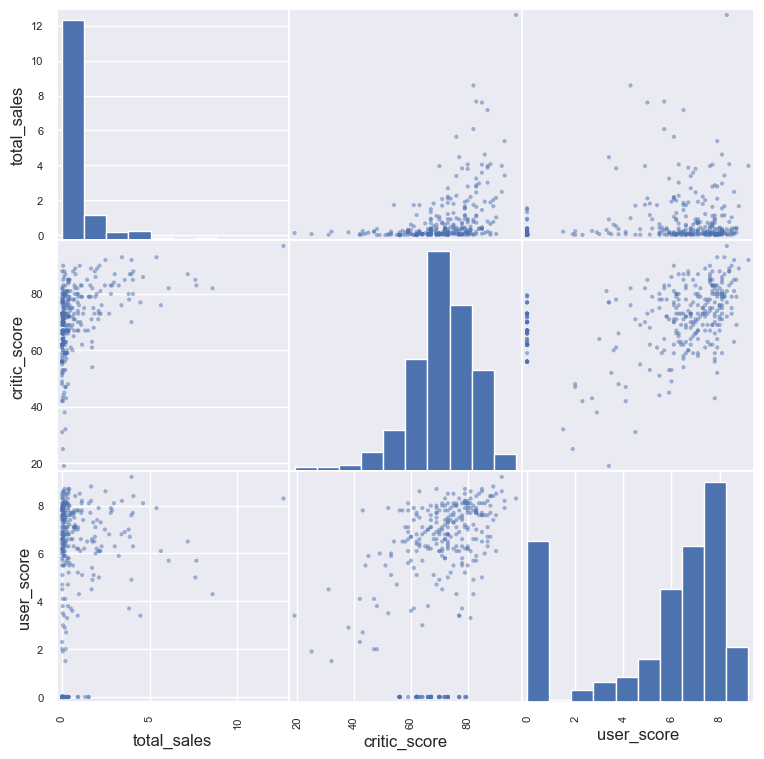

In [319]:


pd.plotting.scatter_matrix\
    (frame= work_data.query('platform == "PS4" & ~user_score.isna()')[['total_sales','critic_score' , 'user_score']], 
                           figsize=(9,9))



plt.show()

Выводы: продажи неплохо коррелируют с оценками критиков и слабее с оценками пользователей. 

- Это в целом логично - обычно пользователь хочет знать, что покупает, опираясь на мнения людей, изучивших продукт
- меньшее значение корреляции между продажами и  оценками пользователей можно объяснить тем, что довольно много игр, которым не присвоено никакой оценки - ввиду того, что игры новые или они не набрали достаточного числа голосов значений, а также большим числом пустых значений

##### 3.7 Посмотрим на общее распределение игр по жанрам. 

Цель: 
- выяснить, что можно сказать о самых прибыльных жанрах
- Выделяются ли жанры с высокими и низкими продажами

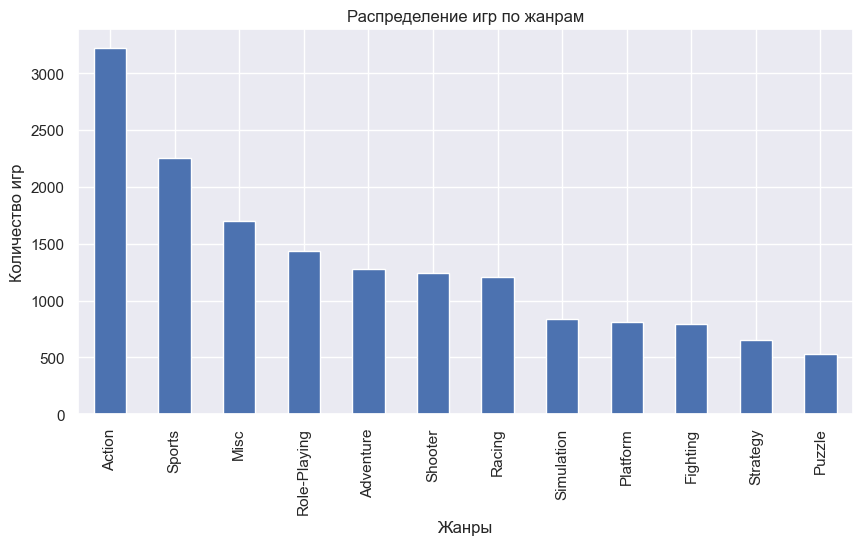

In [324]:
work_data.genre.value_counts().plot(kind='bar', figsize=(10,5))

plt.title('Распределение игр по жанрам')
plt.ylabel('Количество игр')
plt.xlabel('Жанры')

plt.show()


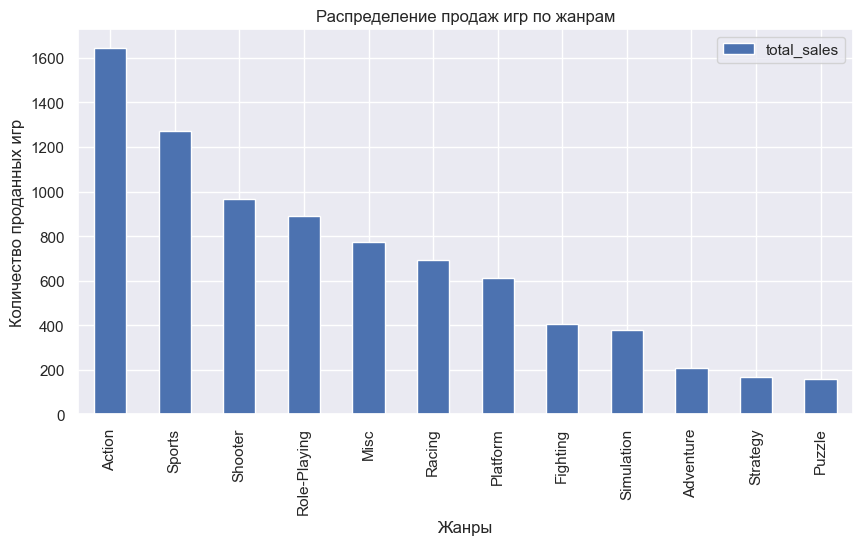

In [329]:
work_data.groupby('genre').agg({'total_sales':'sum'}).sort_values('total_sales', ascending=False)\
    .plot(kind='bar', figsize=(10,5))

plt.title('Распределение продаж игр по жанрам')
plt.ylabel('Количество проданных игр')
plt.xlabel('Жанры')

plt.show()

Наложим две столбчатые диаграммы на один график

In [355]:
num_games = work_data.groupby('genre').agg({'name':'count'}).rename(columns={'name':'num_games'}).reset_index()
num_games

,genre,num_games
0,Action,3223
1,Adventure,1280
2,Fighting,793
3,Misc,1701
4,Platform,808
5,Puzzle,533
6,Racing,1206
7,Role-Playing,1434
8,Shooter,1247
9,Simulation,842


In [356]:
sold_games= work_data.groupby('genre').agg({'total_sales':'sum'}).sort_values('total_sales', ascending=False).reset_index()
sold_games

,genre,total_sales
0,Action,1645.42
1,Sports,1270.01
2,Shooter,967.94
3,Role-Playing,888.47
4,Misc,773.67
5,Racing,693.72
6,Platform,611.83
7,Fighting,405.57
8,Simulation,379.12
9,Adventure,210.25


In [358]:
sold_games.merge(num_games, on='genre').set_index('genre')

,total_sales,num_games
genre,,
Action,1645.42,3223
Sports,1270.01,2250
Shooter,967.94,1247
Role-Playing,888.47,1434
Misc,773.67,1701
Racing,693.72,1206
Platform,611.83,808
Fighting,405.57,793
Simulation,379.12,842


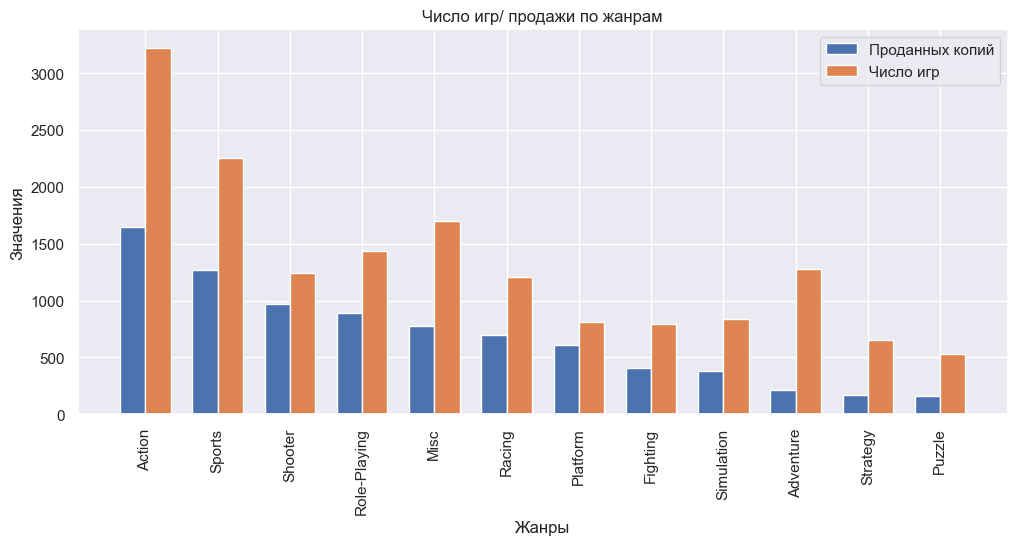

In [365]:

df_for_diag = sold_games.merge(num_games, on='genre')

# Создаем массив для положения столбцов
ind = np.arange(len(df_for_diag['genre']))

# Ширина столбцов
width = 0.35

fig, ax = plt.subplots(figsize=(12,5))

ax.bar(ind, df_for_diag['total_sales'], width, label='Проданных копий')

ax.bar(ind + width, df_for_diag['num_games'], width, label='Число игр')

# Настроим оси и добавим метки
plt.xlabel('Жанры')
plt.ylabel('Значения')
plt.title('Число игр/ продажи по жанрам')
plt.xticks(ind + width / 2, df_for_diag['genre'], rotation=90)
plt.legend()
plt.show()


Выводы: 
1) самые прибыльные жанры игр чаще всего и самые выпускаемые.
2) заметно выделяется жанр Приключений - выпускается много, продается мало
3) самые популярные и продаваемые - Экшн-игры, спортивные, шутеры

##### 3.8 Общие выводы по шагу 3

1) Выпуск игр:
    - в 80-е было выпущено очень мало игр (не больше 50 в год)
    - в середине 90-х начался практически экспоненциальный рост выпуска игр
    - наибольший выпуск произошел между 2009 и 2011 годом - почти 4000 игр за период. Пик зафиксирован в 2008 и 2009 годах - 1428 игр/в год
    - после 2011 года - резкий спад (выпуск сократился более, чем вдвое)


2) Значимые данные для анализа и прогноза - после 1995 года. Применительно к каждой платформе - не более 5 лет, далее популярность платформы заметно падает. Через 10 лет платформа практически всегда исчезает с рынка

3) Топ-6 платформ по продажам за все время:
    - Playstation 2
    - X-box 360
    - Playstation 3
    - Wii (Игровая приставка 7-го поколения, 5-я домашняя консоль фирмы Nintendo и наследница Nintendo GameCube.)
    - Nintendo DS (карманная игровая консоль)
    - Playstation 1 (PS)

4) Топ-3 за последние 5 лет с учетом, что популярность не падает:
    - Playstation 4 (PS4)
    - Xbox One (XOne)
    - Персональные компьютеры (PC)

5) Продажи неплохо коррелируют с оценками критиков и слабее с оценками пользователей: обычно пользователь хочет знать, что покупает, опираясь на мнения людей, изучивших продукт. А меньшее значение корреляции между продажами и  оценками пользователей можно объяснить тем, что довольно много игр, которым не присвоено никакой оценки - ввиду того, что игры новые или они не набрали достаточного числа голосов значений, а также большим числом пустых значений

6) Распределение выпускаемых игр и их продаж по жанрам
    - самые прибыльные жанры игр чаще всего и самые выпускаемые.
    - заметно выделяется жанр Приключений - выпускается много, продается мало
    - самые популярные и продаваемые - Экшн-игры, спортивные, шутеры


#### Шаг 4. Портрет пользователя каждого региона


##### 4.1 Выберем и опишем различия в долях продаж для самых популярных платформ (топ-5).

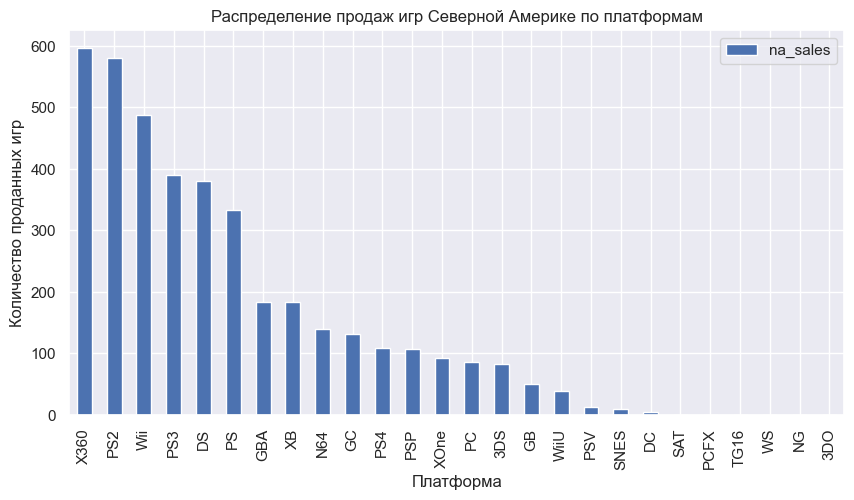

In [368]:
work_data.groupby('platform').agg({'na_sales': 'sum'}).sort_values('na_sales', ascending=False)\
    .plot(kind='bar', figsize=(10,5))

plt.title('Распределение продаж игр Северной Америке по платформам')
plt.ylabel('Количество проданных игр')
plt.xlabel('Платформа')

plt.show()

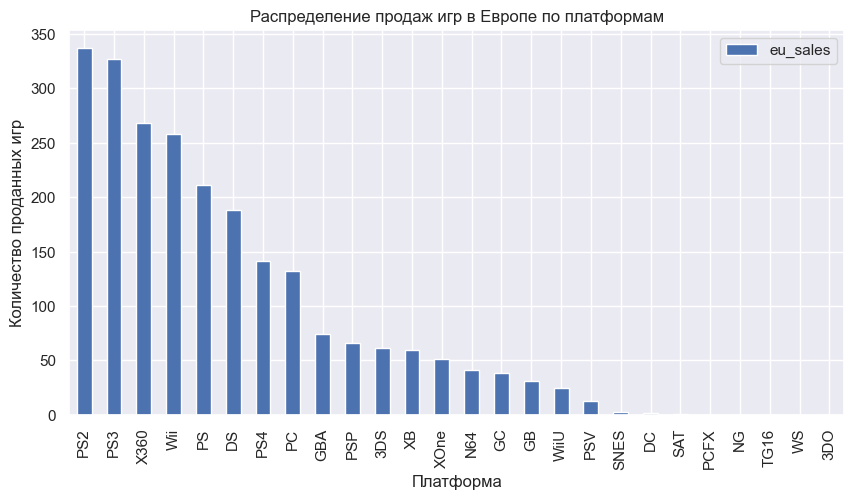

In [370]:
work_data.groupby('platform').agg({'eu_sales': 'sum'}).sort_values('eu_sales', ascending=False)\
    .plot(kind='bar', figsize=(10,5))

plt.title('Распределение продаж игр в Европе по платформам')
plt.ylabel('Количество проданных игр')
plt.xlabel('Платформа')

plt.show()

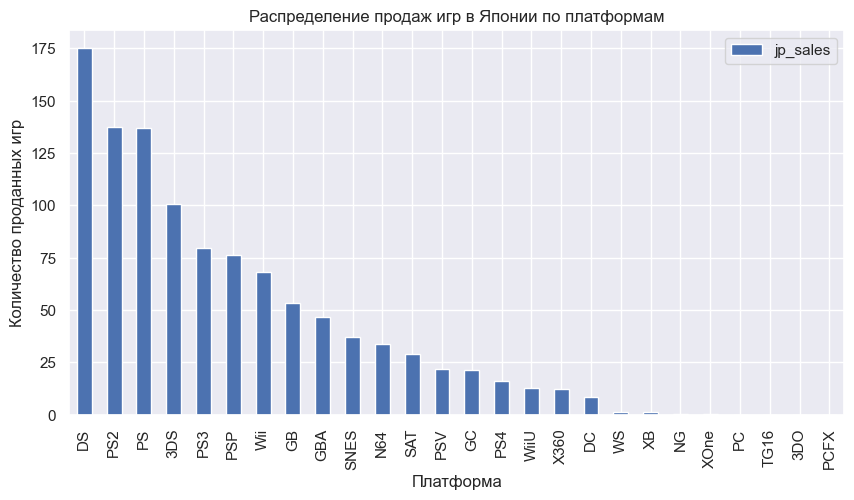

In [371]:
work_data.groupby('platform').agg({'jp_sales': 'sum'}).sort_values('jp_sales', ascending=False)\
    .plot(kind='bar', figsize=(10,5))

plt.title('Распределение продаж игр в Японии по платформам')
plt.ylabel('Количество проданных игр')
plt.xlabel('Платформа')

plt.show()

Нанесем все три столбчатые диаграммы на один график

In [386]:
platform_sales_in_regions= pd.merge(work_data.groupby('platform').agg({'na_sales': 'sum'}).reset_index(),
         work_data.groupby('platform').agg({'eu_sales': 'sum'}).reset_index(),
         on='platform').\
         merge(work_data.groupby('platform').agg({'jp_sales': 'sum'}).reset_index(),
               on='platform').\
               sort_values(['na_sales', 'eu_sales', 'jp_sales'], ascending=False)
    
platform_sales_in_regions

,platform,na_sales,eu_sales,jp_sales
23,X360,595.74,268.37,12.30
12,PS2,580.30,337.00,137.63
21,Wii,486.87,258.32,68.28
13,PS3,390.13,327.21,79.41
3,DS,380.32,188.41,175.00
11,PS,332.96,211.19,137.11
5,GBA,184.12,74.59,46.56
24,XB,183.01,59.74,1.38
7,N64,138.91,41.03,33.76
6,GC,132.17,38.38,21.34


In [381]:
# проверим, что не потеряли никакие платформы
work_data.platform.nunique()

26

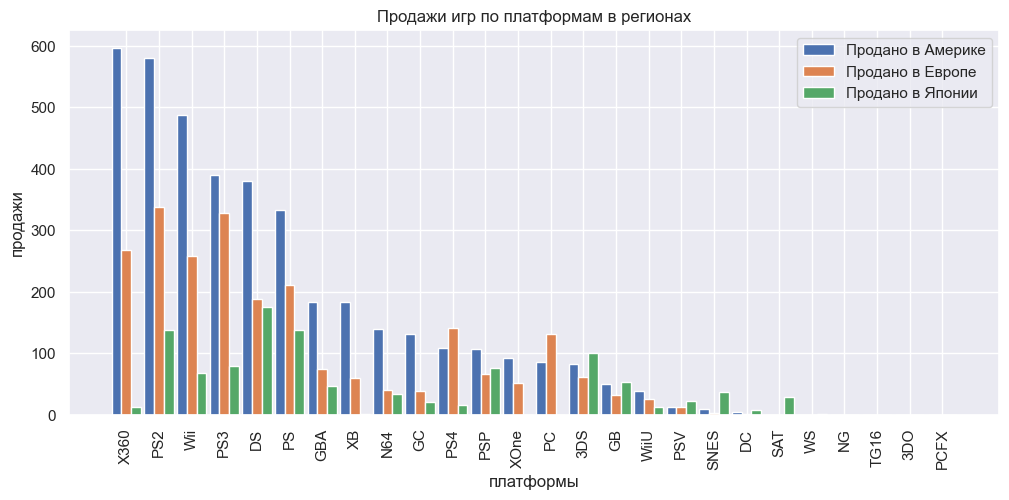

In [395]:
# Создаем массив для положения столбцов
ind = np.arange(len(platform_sales_in_regions['platform']))

# Ширина столбцов
width = 0.3

fig, ax = plt.subplots(figsize=(12,5))

ax.bar(ind, platform_sales_in_regions['na_sales'], width, label='Продано в Америке')

ax.bar(ind + width, platform_sales_in_regions['eu_sales'], width, label='Продано в Европе')

ax.bar(ind + width*2, platform_sales_in_regions['jp_sales'], width, label='Продано в Японии')

# Настроим оси и добавим метки
plt.xlabel('платформы')
plt.ylabel('продажи')
plt.title('Продажи игр по платформам в регионах')
plt.xticks(ind + width , platform_sales_in_regions['platform'], rotation=90)
plt.legend()
plt.show()

<font color='red'>Выводы:</font>

1) ТОП-5 платформ для Америки:
    - X360
    - PS2
    - Wii
    - PS3
    - DS

2) ТОП-5 платформ для Европы:
    - PS2
    - PS3
    - X360
    - Wii
    - PS

3) ТОП-5 платформ для Японии:
    - DS
    - PS2
    - PS
    - 3DS
    - PS3

Америка и Европа не отличаются по выбору платформ (немного отличается их доля популярности), а вот в Японии заметно выделяются "домашние" продукты - Nintendo DS и Nintendo 3DS + там совсем непопулярен Xbox 360 

##### 4.2 Оценим Самые популярные жанры (топ-5) по регионам

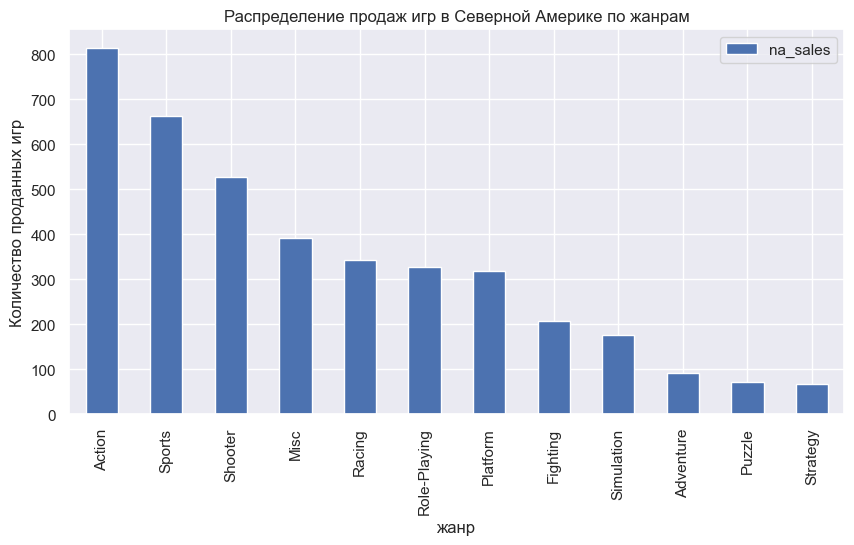

In [397]:
work_data.groupby('genre').agg({'na_sales': 'sum'}).sort_values('na_sales', ascending=False)\
    .plot(kind='bar', figsize=(10,5))

plt.title('Распределение продаж игр в Северной Америке по жанрам')
plt.ylabel('Количество проданных игр')
plt.xlabel('жанр')

plt.show()

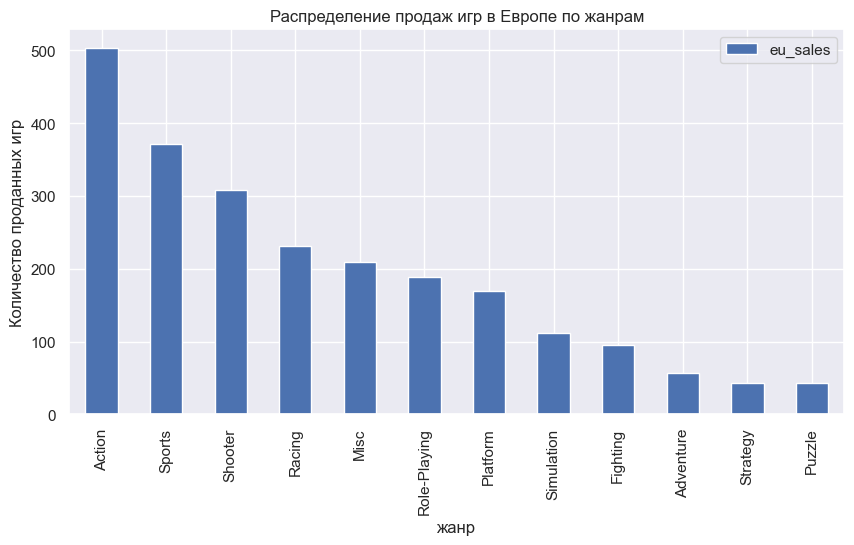

In [399]:
work_data.groupby('genre').agg({'eu_sales': 'sum'}).sort_values('eu_sales', ascending=False)\
    .plot(kind='bar', figsize=(10,5))

plt.title('Распределение продаж игр в Европе по жанрам')
plt.ylabel('Количество проданных игр')
plt.xlabel('жанр')

plt.show()

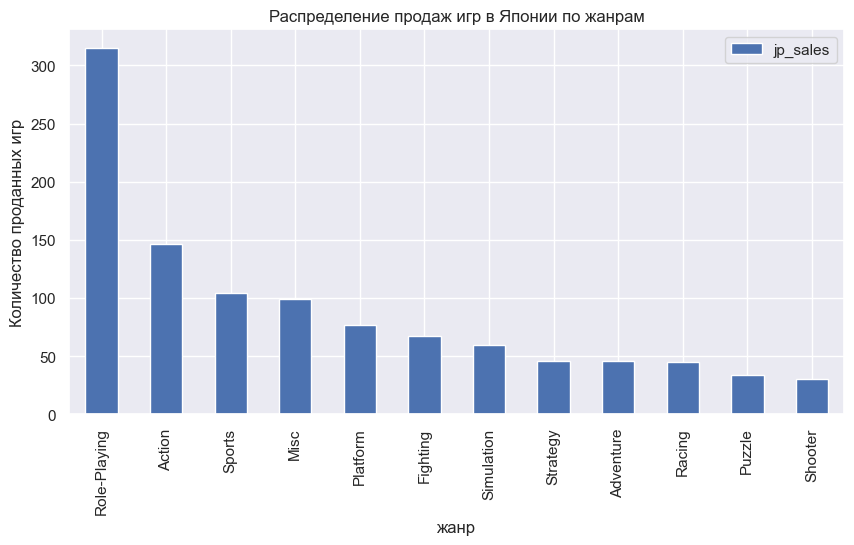

In [400]:
work_data.groupby('genre').agg({'jp_sales': 'sum'}).sort_values('jp_sales', ascending=False)\
    .plot(kind='bar', figsize=(10,5))

plt.title('Распределение продаж игр в Японии по жанрам')
plt.ylabel('Количество проданных игр')
plt.xlabel('жанр')

plt.show()

Построим диаграммы на одном графике

In [401]:
genre_sales_in_regions= pd.merge(work_data.groupby('genre').agg({'na_sales': 'sum'}).reset_index(),
         work_data.groupby('genre').agg({'eu_sales': 'sum'}).reset_index(),
         on='genre').\
         merge(work_data.groupby('genre').agg({'jp_sales': 'sum'}).reset_index(),
               on='genre').\
               sort_values(['na_sales', 'eu_sales', 'jp_sales'], ascending=False)
    
genre_sales_in_regions

,genre,na_sales,eu_sales,jp_sales
0,Action,814.17,503.60,146.46
10,Sports,661.52,370.73,104.62
8,Shooter,527.59,308.23,30.06
3,Misc,392.43,208.88,99.51
6,Racing,343.42,230.82,44.77
7,Role-Playing,327.55,188.08,315.17
4,Platform,318.83,170.03,77.05
2,Fighting,206.82,95.52,67.67
9,Simulation,177.05,111.77,59.96
1,Adventure,91.86,56.75,45.68


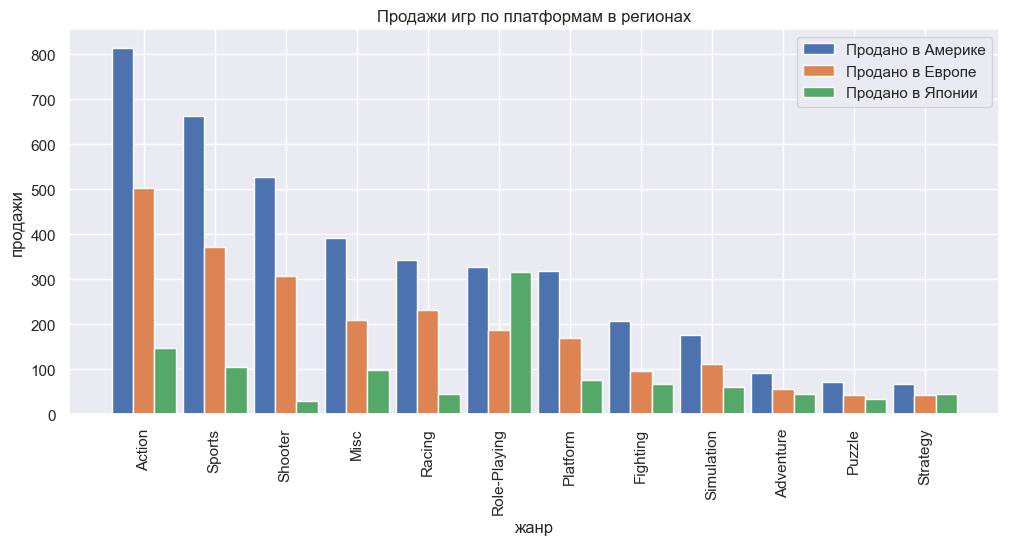

In [402]:
# Создаем массив для положения столбцов
ind = np.arange(len(genre_sales_in_regions['genre']))

# Ширина столбцов
width = 0.3

fig, ax = plt.subplots(figsize=(12,5))

ax.bar(ind, genre_sales_in_regions['na_sales'], width, label='Продано в Америке')

ax.bar(ind + width, genre_sales_in_regions['eu_sales'], width, label='Продано в Европе')

ax.bar(ind + width*2, genre_sales_in_regions['jp_sales'], width, label='Продано в Японии')

# Настроим оси и добавим метки
plt.xlabel('жанр')
plt.ylabel('продажи')
plt.title('Продажи игр по платформам в регионах')
plt.xticks(ind + width , genre_sales_in_regions['genre'], rotation=90)
plt.legend()
plt.show()

<font color='red'>Выводы:</font>

1) ТОП-5 жанров для Америки:
    - Экшн
    - Спортивные
    - Шутеры
    - Misc
    - Гонки

2) ТОП-5 жанров для Европы:
    - Экшн
    - Спортивные
    - Шутеры
    - Гонки
    - Misc

3) ТОП-5 платформ для Японии:
    - Role-Playing
    - Экшн
    - Спортивные
    - Misc
    - Platform

Америка и Европа еще меньше отличаются по популярности жанров, чем по платформам (Гонки в Европе чуть популярнее), а вот вкусы игроков Японии заметно выделяются: на первом месте Ролевые игры, серединка интересов совпадает с Америкой и Европой, но в списке (хоть и на последнем месте) присутствует жанр Платформа.

##### 4.3 Посмотрим, влияет ли рейтинг ESRB на продажи в отдельном регионе

для это построим матрицу корреляции и посчитаем к-т Спирмена

In [403]:
work_data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales,genre_id,platform_id,med_cr_score,rating_id
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54,0,0,76.0,0
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52,2,0,82.0,0
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77,0,0,80.0,0
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,67.0,NaN,NaN,31.38,3,2,NaN,1
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,29.80,1,3,89.0,0


In [405]:
work_data[['na_sales', 'eu_sales','jp_sales', 'rating_id']].corr()

,na_sales,eu_sales,jp_sales,rating_id
na_sales,1.000000,0.837534,0.427434,0.006839
eu_sales,0.837534,1.000000,0.457028,0.004936
jp_sales,0.427434,0.457028,1.000000,-0.038472
rating_id,0.006839,0.004936,-0.038472,1.000000


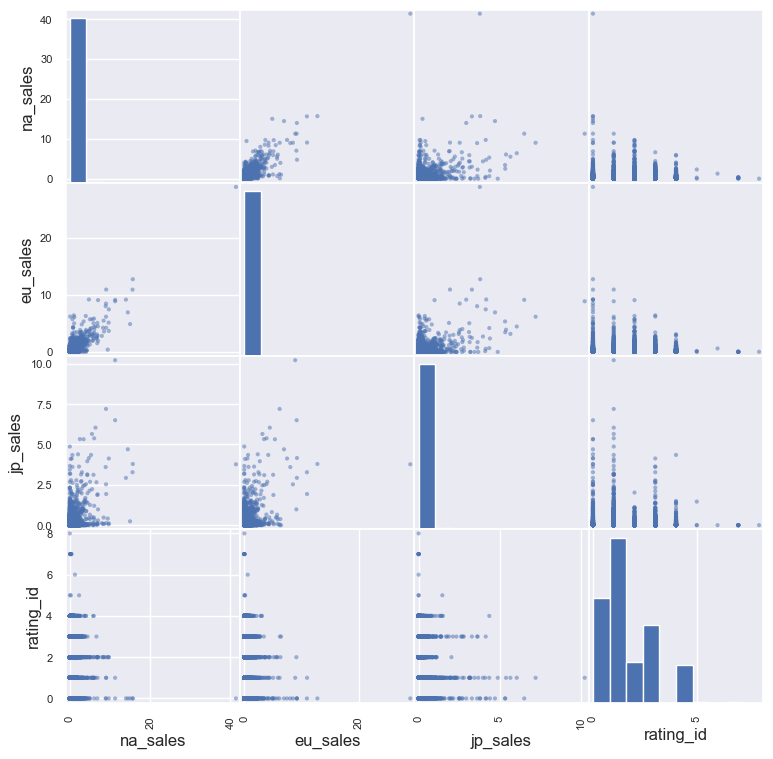

In [406]:
pd.plotting.scatter_matrix\
    (frame= work_data[['na_sales', 'eu_sales','jp_sales', 'rating_id']], 
                           figsize=(9,9))



plt.show()

<font color='red'>Вывод:</font> корреляция между рейтингом и продажами по регионам практически отсутствует (или взаимосвязь сложнее)

#### Шаг 5. Гипотезы


##### 5.1 Средние пользовательские рейтинги платформ Xbox One и PC

<font color='red'>Нулевая гипотеза:</font> Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

<font color='green'>Альтернативная гипотеза:</font> Средние пользовательские рейтинги платформ Xbox One и PC отличаются



Посчитаем средние обеих выборок

In [409]:
work_data.groupby('platform').agg({'user_score':'mean'}).\
    rename(columns={'user_score': 'mean_user_score'}).\
    query('platform.isin(["XOne", "PC"])')

,mean_user_score
platform,
PC,6.584796
XOne,5.761650


посмотрим на распределения выборок

<AxesSubplot: >

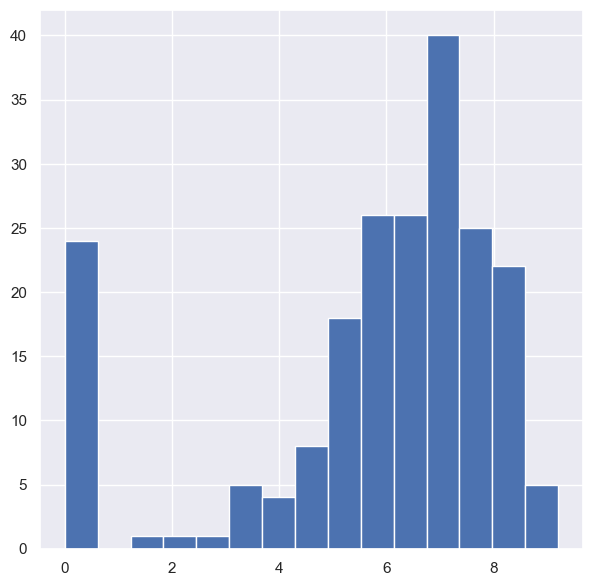

In [414]:
work_data.query('platform== "XOne"').user_score.hist(bins=15)

<AxesSubplot: >

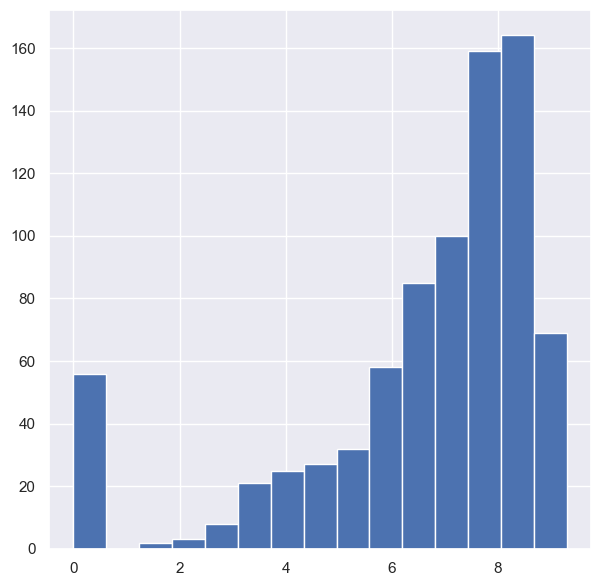

In [417]:
work_data.query('platform== "PC"').user_score.hist(bins=15)

<AxesSubplot: ylabel='Frequency'>

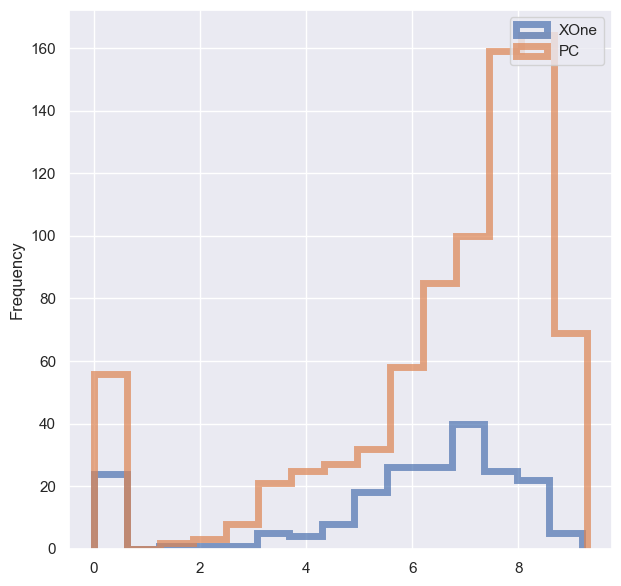

In [416]:
ax = work_data.query('platform== "XOne"').plot(
    kind='hist',
    y='user_score',
    histtype='step',
    #range=(0, 500),
    bins=15,
    linewidth=5,
    alpha=0.7,
    label='XOne',
)
work_data.query('platform== "PC"').plot(
    kind='hist',
    y='user_score',
    histtype='step',
    #range=(0, 500),
    bins=15,
    linewidth=5,
    alpha=0.7,
    label='PC',
    ax=ax,
    grid=True,
    legend=True,
)

Обе гистограммы немного скошены вправо и имеют некоторое количество нулевых значений (это те самые оценки 'tbd', которые мы пока не знаем и не можем узнать)

Используем t-Test для сравнения средних

In [418]:
from scipy import stats as st

alpha = 0.05 # уровень статистической значимости
# если p-value окажется меньше него, отвергнем гипотезу

results = st.ttest_ind(work_data.query('platform== "PC"').user_score, 
                       work_data.query('platform== "XOne"').user_score)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: nan
Не получилось отвергнуть нулевую гипотезу


Мешаются пустые значения. дропнем их для проверки гипотез

In [420]:
work_data.query('platform== "PC"').user_score.dropna()

85       7.6
138      7.3
192      4.0
218      8.2
284      9.1
        ... 
16680    8.1
16691    7.6
16695    5.8
16701    7.2
16704    5.8
Name: user_score, Length: 809, dtype: float64

In [421]:
work_data.query('platform== "XOne"').user_score.dropna()

165      7.9
179      5.4
242      6.4
270      6.2
373      4.1
        ... 
16629    8.2
16642    6.6
16644    0.0
16659    6.7
16671    0.0
Name: user_score, Length: 206, dtype: float64

In [422]:
from scipy import stats as st

alpha = 0.05 # уровень статистической значимости
# если p-value окажется меньше него, отвергнем гипотезу

results = st.ttest_ind(work_data.query('platform== "PC"').user_score.dropna(), 
                       work_data.query('platform== "XOne"').user_score.dropna())

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 8.122234430094645e-06
Отвергаем нулевую гипотезу


На всякий случай добавим необязательный параметр equal_var=False , ведь мы ничего не знаем о равенстве дисперсий

In [430]:

alpha = 0.05 # уровень статистической значимости
# если p-value окажется меньше него, отвергнем гипотезу

results = st.ttest_ind(work_data.query('platform== "PC"').user_score.dropna(), 
                       work_data.query('platform== "XOne"').user_score.dropna(),
                       equal_var= False)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 2.0538550605911192e-05
Отвергаем нулевую гипотезу


p-value заметно выросло, но все же статистическая значимость ниже заданного порога

Еще раз смотрим на значения средних двух выборок:

In [423]:
work_data.groupby('platform').agg({'user_score':'mean'}).\
    rename(columns={'user_score': 'mean_user_score'}).\
    query('platform.isin(["XOne", "PC"])')

,mean_user_score
platform,
PC,6.584796
XOne,5.761650


<font color='red'>Вывод:</font> неравенство средних значений оценок пользователей для платформ XOne и PC статистически значимо. Проще говоря, можно считать, <font color='green'>что они не равны,</font> принимаем альтернативную гипотезу

##### 5.2 Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports разные

<font color='red'>Нулевая гипотеза:</font> Средние пользовательские рейтинги жанров Action и Sports равны

<font color='green'>Альтернативная гипотеза:</font> Средние пользовательские рейтинги жанров Action и Sports отличаются




Посчитаем средние обеих выборок


In [424]:
work_data.groupby('genre').agg({'user_score':'mean'}).\
    rename(columns={'user_score': 'mean_user_score'}).\
    query('genre.isin(["Action", "Sports"])')

,mean_user_score
genre,
Action,5.632726
Sports,5.034508


Посмотрим на их гистограммы

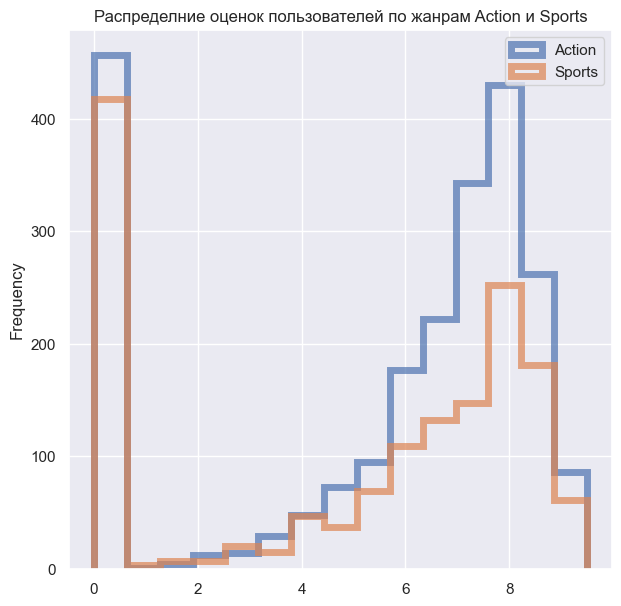

In [427]:
ax = work_data.query('genre== "Action"').plot(
    kind='hist',
    y='user_score',
    histtype='step',
    #range=(0, 500),
    bins=15,
    linewidth=5,
    alpha=0.7,
    label='Action',
)
work_data.query('genre== "Sports"').plot(
    kind='hist',
    y='user_score',
    histtype='step',
    #range=(0, 500),
    bins=15,
    linewidth=5,
    alpha=0.7,
    label='Sports',
    ax=ax,
    grid=True,
    legend=True,
)

plt.title('Распределние оценок пользователей по жанрам Action и Sports')
plt.show()

Используем t-Test для сравнения средних (NaN значения дропнем)

In [428]:

from scipy import stats as st

alpha = 0.05 # уровень статистической значимости
# если p-value окажется меньше него, отвергнем гипотезу

results = st.ttest_ind(work_data.query('genre== "Action"').user_score.dropna(), 
                       work_data.query('genre== "Sports"').user_score.dropna())

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 2.8487598220776075e-08
Отвергаем нулевую гипотезу


На всякий случай добавим необязательный параметр equal_var=False , ведь мы ничего не знаем о равенстве дисперсий

In [429]:
from scipy import stats as st

alpha = 0.05 # уровень статистической значимости
# если p-value окажется меньше него, отвергнем гипотезу

results = st.ttest_ind(work_data.query('genre== "Action"').user_score.dropna(), 
                       work_data.query('genre== "Sports"').user_score.dropna(),
                       equal_var= False)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 5.08742711412412e-08
Отвергаем нулевую гипотезу


p-value заметно выросло, но все же статистическая значимость ниже заданного порога

<font color='red'>Вывод:</font> неравенство средних значений оценок пользователей для жанров Action и Sports статистически значимо. Проще говоря, можно считать, <font color='green'>что они не равны,</font> принимаем альтернативную гипотезу



Для проверки обеих гипотез (5.1 и 5.2) был применен t-Test, потому что: 

1) Генеральные совокупности в обоих случаях не зависят друг от друга. 

2) Выборочные средние нормально распределены. Это условие не должно быть препятствием благодаря ЦПТ. Если размер выборки составляет хотя бы несколько десятков значений, то выборочные средние, которые можно получить из одной и той же генеральной совокупности, будут распределены близко к нормальному вокруг истинного среднего этой совокупности. Это так, даже если сама генеральная совокупность не распределена нормально.

3) Информации о равенстве или неравенстве дисперсий у нас нет, поэтому мы использовали оба варианта для расчета p-value значимости. Результат был неизменен в обоих случаях.

#### 6. Общие выводы по проекту

1) Данные нуждались в предобработке, были почищены от дубликатов, заполнены пустые значения (где это было возможно), приведены в соответствия названия и типы данных

_____________________________________________________________________

2) Проведен Исследовательский анализ данных. Выявлено:

    Выпуск игр:
    - в 80-е было выпущено очень мало игр (не больше 50 в год)
    - в середине 90-х начался практически экспоненциальный рост выпуска игр
    - наибольший выпуск произошел между 2009 и 2011 годом - почти 4000 игр за период. Пик зафиксирован в 2008 и 2009 годах - 1428 игр/в год
    - после 2011 года - резкий спад (выпуск сократился более, чем вдвое)

    Значимые данные для анализа и прогноза - после 1995 года. Применительно к каждой платформе - не более 5 лет, далее популярность платформы заметно падает. Через 10 лет платформа практически всегда исчезает с рынка

    Топ-6 платформ по продажам за все время:
    - Playstation 2
    - X-box 360
    - Playstation 3
    - Wii (Игровая приставка 7-го поколения, 5-я домашняя консоль фирмы Nintendo и наследница Nintendo GameCube.)
    - Nintendo DS (карманная игровая консоль)
    - Playstation 1 (PS)

    Топ-3 за последние 5 лет с учетом, что популярность не падает:
    - Playstation 4 (PS4)
    - Xbox One (XOne)
    - Персональные компьютеры (PC)


    Распределение выпускаемых игр и их продаж по жанрам
    - самые прибыльные жанры игр чаще всего и самые выпускаемые.
    - заметно выделяется жанр Приключений - выпускается много, продается мало
    - самые популярные и продаваемые - Экшн-игры, спортивные, шутеры

_____________________________________________________________________

3) Определен портрет пользователя по регионам (Америка, Европа, Япония)

    - для Америки и Европы популярнее всего платформы Xbox360, PlayStation 2, PlayStation 3. Поиграть жители этих регионов больше всего любят в Экшн-игры, спортивные и шутеры

    - для Японии наиболее популярной является родная nintendo DS, а также PlayStation 2 и PlayStation. Предпочитаемые жанры для игр в целом совпадают с Западным миром, но наиболее любимый вид - Ролевые игры.

_____________________________________________________________________

4) Были проверены гипотезы о том, как соотносятся оценки пользователей для двух отдельно взятых платформ и двух отдельно взятых жанров и было выявлено:

    - Средние пользовательские рейтинги платформ Xbox One и PC статистически значимо отличаются
    
    - Средние пользовательские рейтинги жанров Action и Sports статистически значимо отличаются
